In [1]:
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scienceplots


base_path = "./data/processed_data/"
path_counter = base_path + "counter/"
path_mean_std = base_path + "mean_std/"

base_plot_path = "./plots/"

base_name = "results_{}__{}_{}.pt"

dataset_list = ['c4', 'oscar', 'redpajama', 'wikitext2', 'pile', 'gsm8k', 'svamp', 'mawps', 'anli_r1', 'esnli', 'rte', 'boolq', 'commonsense_qa', 'race',
                'winogrande', 'wmt14', 'iwslt', 'opc', 'ds1000', 'mbpp']

pruning_groups = ['Language Modeling', 'Mathematical Reasoning', 'Question Answering', 'NLI',  'Translation', 'Coding']

model_list = ['meta-llama/Llama-2-7b-hf', 'mistralai/Mistral-7B-v0.1', 'microsoft/phi-2', 'baichuan-inc/Baichuan-7B', 'Qwen/Qwen2.5-7B' ]
models_names_print = ['Llama', 'Phi', 'Mistral', 'Baichuan', 'Qwen']
model_name = models_names_print #[name.split('/')[1] for name in model_list] #, 'Llama-3.2-1B']
rename_dictionary_model_names = {model_list[i]: models_names_print[i] for i in range(len(model_list))}
sparsity_list = [0.1, 0.3, 0.5, 0.7, 0.9]
plt.style.use('science')

sns.set_context("notebook", rc={
    "axes.linewidth": 0.5,
    "axes.titlesize": 22,
    "axes.labelsize": 18,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
})

dataset_list_print = ['C4', 'OSCAR', 'RedPajama', 'Wikitext', 'Pile', 'GSM8K', 'SVAMP', 'MAWPS', 'ANLI', 'e-SNLI', 'RTE', 'BoolQ', 'CommonsenseQA', 'RACE', 'WinoGrande', 'WMT14', 'IWSLT', 'RefineCode', 'DS1000', 'MBPP']
rename_dictionary_dataset = {dataset_list[i]: dataset_list_print[i] for i in range(len(dataset_list))}


In [2]:
#Create a custom color palette for the plot

original_cmap = sns.color_palette("Spectral_r", as_cmap=True) 
colors = np.concatenate((original_cmap(np.linspace(0, 0.35, 4)), original_cmap(np.linspace(0.6, 1, 4))), axis=0) # Extract 10 colors
custom_palette = np.clip(colors, 0, 1) # Ensure valid RGB range
custom_palette = [tuple(c) for c in custom_palette]  # Convert array to list of 


palette_heatmap =  sns.color_palette("Blues", as_cmap=True) 
colors_blues = np.concatenate((palette_heatmap(np.linspace(0, 0.35, 1)), palette_heatmap(np.linspace(0.8, 1, 10))), axis=0) # Extract 10 colors
custom_blues = np.clip(colors_blues, 0, 1) # Ensure valid RGB range
custom_blues = [tuple(c) for c in custom_blues]  # Convert array to list of 

one_color = sns.color_palette("mako", as_cmap=True).colors[190]

In [3]:
results = pd.read_csv("./results.csv") # results.csv

metric_map = {
    'c4': 'ppl',
    'oscar': 'ppl',
    'redpajama': 'ppl',
    'wikitext2': 'ppl',
    'pile': 'ppl',
    'gsm8k': 'acc',
    'svamp': 'acc',
    'mawps': 'acc',
    'anli_r1': 'acc',
    'esnli': 'acc',
    'rte': 'acc',
    'boolq': 'acc',
    'commonsense_qa': 'acc',
    'race': 'acc',
    'winogrande': 'acc',
    'wmt14': 'bleu',
    'iwslt': 'bleu',
    'opc': 'f1',
    'ds1000': 'f1',
    'mbpp': 'f1',
}

task_map = {
    'none': 'Dense',
    'c4': 'Language Modeling',
    'oscar': 'Language Modeling',
    'redpajama': 'Language Modeling',
    'wikitext2': 'Language Modeling',
    'pile': 'Language Modeling',
    'gsm8k': 'Mathematical Reasoning',
    'svamp': 'Mathematical Reasoning',
    'mawps': 'Mathematical Reasoning',
    'anli_r1': 'NLI',
    'esnli': 'NLI',
    'rte': 'NLI',
    'boolq': 'Question Answering',
    'commonsense_qa': 'Question Answering',
    'race': 'Question Answering',
    'winogrande': 'Question Answering',
    'wmt14': 'Translation',
    'iwslt': 'Translation',
    'opc': 'Coding',
    'ds1000': 'Coding',
    'mbpp': 'Coding',
}

results["dataset_group"] = results["dataset"].map(task_map)
results["pruning_group"] = results["pruning_data"].map(task_map)

order_columns = ['Dense'] + dataset_list_print #, 'c4', 'oscar', 'pile', 'redpajama', 'wikitext2', 'anli_r1', 'boolq', 'commonsense_qa', 'esnli', 'gsm8k', 'mawps', 'race',  'rte',   'svamp',  'winogrande', 'iwslt',  'wmt14', 'ds1000', 'mbpp', 'opc']
order_columns_grouped = ['Dense', 'Language Modeling', 'Mathematical Reasoning', 'Question Answering', 'NLI',  'Translation', 'Coding']

headers = {
    'selector': 'th.col_heading',
    'props': 'background-color: #5E17EB; color: white;'
}

index_style = {
    'selector': 'th.index_name',
    'props': 'background-color: #5E17EB; color: white;'
}

#none is the dense model
results['pruning_data'] = results['pruning_data'].replace({'none': 'dense'})

results['metric'] = results['dataset'].map(metric_map)
print(results['metric'].unique())

print(results['dataset'].unique())

results['value'] = results.apply(lambda row: row[row['metric']], axis=1)
precision = 3
results['value'] = results['value'].round(precision)


results['model'] = results['model'].replace(rename_dictionary_model_names)
results['dataset'] = results['dataset'].replace(rename_dictionary_dataset)
results['dataset'] = results['dataset'].replace({'dense': 'Dense'})

results['pruning_data'] = results['pruning_data'].replace(rename_dictionary_dataset)
results['pruning_data'] = results['pruning_data'].replace({'dense': 'Dense'})


['acc' 'ppl' 'f1' 'bleu']
['anli_r1' 'boolq' 'c4' 'commonsense_qa' 'ds1000' 'esnli' 'gsm8k' 'iwslt'
 'mawps' 'mbpp' 'opc' 'oscar' 'pile' 'race' 'redpajama' 'rte' 'svamp'
 'wikitext2' 'winogrande' 'wmt14']


<h1>Percentage results</h1>

In [4]:

def get_percentage_values(data, metric):
    
    list_this__dataset = data['dataset'].unique()
    analyze_dataset = []
    for datasetname in list_this__dataset: #Voglio solo i dataset, non anche le medie tra i vari datset (all, all_prototype, ...)
        if datasetname in dataset_list_print:
            analyze_dataset.append(datasetname)
    
    for group_value in analyze_dataset: #analyze_dataset:
        group_mask = data['dataset'] == group_value
        dense_mask = group_mask & (data['pruning_data'] == 'Dense')

        # Estrai valore di riferimento
        ref_rows = data.loc[dense_mask, metric]
        
        if not ref_rows.empty:
            ref_value = ref_rows.iloc[0]

            if ref_value == 0:
                print("ref_value = 0")
                
            
            # Assegna i valori normalizzati direttamente tramite .loc (modo sicuro)
            if metric == "ppl":
                data.loc[group_mask, 'percentage'] = ref_value / data.loc[group_mask, metric]
            else:
                data.loc[group_mask, 'percentage'] = data.loc[group_mask, metric] / ref_value
            
        else:
            print(f"Nessuna riga 'dense' per a3 == {group_value}")
            

    return data

#print(len(results[(results['dataset_group'] == 'aritm_reasoning') & (results['sparsity'] == 0.7) & (results['model'] == 'meta-llama/Llama-2-7b-hf')]))

processed_data = pd.DataFrame()

for model in models_names_print:
    for sparsity in sparsity_list:
        for metric in ['ppl', 'acc', 'bleu', 'f1']:
            this_data = results[(results['model'] == model) & ((results['sparsity'] == sparsity) | (results['sparsity'] == 0.0)) & (results["metric"] == metric)]
            normalized_data = get_percentage_values(this_data, metric)
            
            processed_data = pd.concat([processed_data, normalized_data], ignore_index=True)
            
            
"""for model in model_list:
    for sparsity in sparsity_list:
        for dataset_start in dataset_list:
            mask_task_start = (processed_data['dataset'] == dataset_start) & (processed_data['pruning_data'] == dataset_start) & (processed_data['sparsity'] == sparsity) & (processed_data['model'] == model)
            ref_data_sp_task_start = processed_data.loc[mask_task_start, 'value']

            if not ref_data_sp_task_start.empty:
                ref_value = ref_data_sp_task_start.iloc[0]
                #print(processed_data.loc[mask_task_start, 'percentage'])

                for dataset_target in dataset_list:
                    mask_task_target = (processed_data['dataset'] == dataset_start) & (processed_data['pruning_data'] == dataset_target) & (processed_data['sparsity'] == sparsity)  & (processed_data['model'] == model)
                    processed_data.loc[mask_task_target, 'percentage_wrt_dataset'] = processed_data.loc[mask_task_target, 'value'] / ref_value
                    """

#print(processed_data[(processed_data['dataset_group'] == 'aritm_reasoning') & (processed_data['sparsity'] == 0.7) & (processed_data['model'] == 'meta-llama/Llama-2-7b-hf')])
#print(len(processed_data[(processed_data['dataset_group'] == 'aritm_reasoning') & (processed_data['sparsity'] == 0.7) & (processed_data['model'] == 'meta-llama/Llama-2-7b-hf')]))

processed_data['percentage_wrt_task'] = 0

for model in models_names_print:
    for sparsity in sparsity_list:
        for dataset_group in pruning_groups:

            #max_val = processed_data[(processed_data['dataset_group'] == dataset_group) & (processed_data['sparsity'] == sparsity) & (processed_data['model'] == model)].groupby('pruning_group').agg({"value": "mean"}).max()

            mask_task_start = (processed_data['dataset_group'] == dataset_group) & (processed_data['pruning_group'] == dataset_group) & (processed_data['sparsity'] == sparsity) & (processed_data['model'] == model)
            ref_data_sp_task_start = processed_data.loc[mask_task_start, 'value']
            
            if not ref_data_sp_task_start.empty:
                #ref_value = max_val.iloc[0]
                ref_value = ref_data_sp_task_start.mean()

                for pruning_group in pruning_groups:
                    mask_task_target = (processed_data['dataset_group'] == dataset_group) & (processed_data['pruning_group'] == pruning_group) & (processed_data['sparsity'] == sparsity)  & (processed_data['model'] == model)
                    
                    if ref_value > 0:
                        #print(processed_data[(processed_data['dataset_group'] == dataset_group) & (processed_data['pruning_group'] == pruning_group) & (processed_data['sparsity'] == sparsity)  & (processed_data['model'] == model)]["value"].mean()) #['value'].mean())
                        processed_data.loc[mask_task_target, 'percentage_wrt_task'] = processed_data.loc[mask_task_target, 'value'].mean() / ref_value
                    
                    """print(ref_value)
                    print("/")
                    print(processed_data.loc[mask_task_target, 'percentage'])
                    print("=")
                    
                    print(processed_data.loc[mask_task_target, 'percentage_wrt_task'])
                    print("-----\n\n")"""
            else:
                print(f"Nessuna riga 'dense' per a3 == {dataset_group, sparsity, model}")
                



#print(len(processed_data[(processed_data['dataset_group'] == 'aritm_reasoning') & (processed_data['sparsity'] == 0.7) & (processed_data['model'] == 'meta-llama/Llama-2-7b-hf')]))
#print(processed_data[(processed_data['dataset_group'] == 'aritm_reasoning') & (processed_data['sparsity'] == 0.7) & (processed_data['model'] == 'meta-llama/Llama-2-7b-hf')])

processed_data = processed_data[~((processed_data['model'] == 'Baichuan') & (processed_data['dataset'] == 'BoolQ'))]
processed_data = processed_data[~((processed_data['model'] == 'Qwen') & (processed_data['dataset'] == 'RACE'))]
processed_data = processed_data[processed_data['dataset'] != 'GSM8K'] #Attualmente non ha valori sensati


processed_data = processed_data[processed_data['pruning_data'].isin(dataset_list_print)] #Attualmente non ha valori sensati

processed_data.to_csv("processed_data.csv", index=False)

#print(processed_data[('aritm_reasoning', 0.7, 'meta-llama/Llama-2-7b-hf')])


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/3269565506.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[group_mask, 'percentage'] = ref_value / data.loc[group_mask, metric]
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/3269565506.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[group_mask, 'percentage'] = data.loc[group_mask, metric] / ref_value
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/3269565506.py:27: SettingWithCopyWar

In [5]:
#Group by dataset
counter_same_pruning_evaluation_dataset = pd.DataFrame()
this_data_counter = this_data.copy()

for model in models_names_print:
    for sparsity in sparsity_list:
        this_data_counter = processed_data[(processed_data['model'] == model) & ((processed_data['sparsity'] == sparsity))]
        counter = 0
        total_counter = 0
        for eval_task in dataset_list_print:
            mask_same_pruning_evaluation = this_data_counter['dataset'] == eval_task
            same_pruning_evaluation = this_data_counter[mask_same_pruning_evaluation]

            if same_pruning_evaluation.empty:
                continue
        
            highest_percentage_instance = same_pruning_evaluation.loc[same_pruning_evaluation['percentage'].idxmax()]
            pruning_dataset = highest_percentage_instance['pruning_data']
            
            if pruning_dataset == eval_task:
                counter += 1
            total_counter += 1
            
        new_data = pd.DataFrame({
            'model': [model],
            'sparsity': [sparsity],
            'correct_counter': [counter],
            'total_counter': [total_counter],
            'percentage_correct': [counter / total_counter if total_counter > 0 else 0]
        })
        counter_same_pruning_evaluation_dataset = pd.concat([counter_same_pruning_evaluation_dataset, new_data], ignore_index=True)



#Group by task
counter_same_pruning_evaluation_task = pd.DataFrame()
this_data_counter = this_data.copy()

for model in models_names_print:
    for sparsity in sparsity_list:
        this_data_counter = processed_data[(processed_data['model'] == model) & ((processed_data['sparsity'] == sparsity))]
        counter = 0
        total_counter = 0
        for eval_task in pruning_groups:
            mask_same_pruning_evaluation = this_data_counter['dataset_group'] == eval_task
            same_pruning_evaluation = this_data_counter[mask_same_pruning_evaluation]
            same_pruning_evaluation = same_pruning_evaluation.groupby('pruning_group').agg({'percentage': 'mean', 'value': 'mean'}).reset_index()

            if same_pruning_evaluation.empty:
                continue
        
            highest_percentage_instance = same_pruning_evaluation.loc[same_pruning_evaluation['percentage'].idxmax()]
            pruning_task = highest_percentage_instance['pruning_group']
            if pruning_task == eval_task:
                counter += 1
            total_counter += 1
            
        new_data = pd.DataFrame({
            'model': [model],
            'sparsity': [sparsity],
            'correct_counter': [counter],
            'total_counter': [total_counter],
            'percentage_correct': [counter / total_counter if total_counter > 0 else 0]
        })
        counter_same_pruning_evaluation_task = pd.concat([counter_same_pruning_evaluation_task, new_data], ignore_index=True)


#print(counter_same_pruning_evaluation_dataset)
#print(counter_same_pruning_evaluation_task)

In [6]:
#Group by dataset
counter_same_pruning_evaluation_dataset_mean_models = pd.DataFrame()
this_data_counter = this_data.copy()

this_data_counter = this_data_counter.groupby(['dataset', 'pruning_data', 'sparsity']).agg({'percentage': 'mean', 'value': 'mean'}).reset_index()
print(this_data_counter)

for sparsity in sparsity_list:
    #this_data_counter = processed_data[(processed_data['model'] == model) & ((processed_data['sparsity'] == sparsity))]
    this_data_counter = processed_data[(processed_data['sparsity'] == sparsity)]
    counter = 0
    total_counter = 0
    for eval_task in dataset_list_print:
        mask_same_pruning_evaluation = this_data_counter['dataset'] == eval_task
        same_pruning_evaluation = this_data_counter[mask_same_pruning_evaluation]

        if same_pruning_evaluation.empty:
            continue
    
        highest_percentage_instance = same_pruning_evaluation.loc[same_pruning_evaluation['percentage'].idxmax()]
        pruning_dataset = highest_percentage_instance['pruning_data']
        
        if pruning_dataset == eval_task:
            counter += 1
        total_counter += 1
        
    new_data = pd.DataFrame({
        'sparsity': [sparsity],
        'correct_counter': [counter],
        'total_counter': [total_counter],
        'percentage_correct': [counter / total_counter if total_counter > 0 else 0]
    })
    counter_same_pruning_evaluation_dataset_mean_models = pd.concat([counter_same_pruning_evaluation_dataset_mean_models, new_data], ignore_index=True)

#print(counter_same_pruning_evaluation_dataset_mean_models)


#Group by task
counter_same_pruning_evaluation_task_mean_models = pd.DataFrame()
this_data_counter = this_data.copy()
this_data_counter = this_data_counter.groupby(['dataset_group', 'pruning_group', 'sparsity']).agg({'percentage': 'mean', 'value': 'mean'}).reset_index()

for sparsity in sparsity_list:
    #this_data_counter = processed_data[(processed_data['model'] == model) & ((processed_data['sparsity'] == sparsity))]
    this_data_counter = processed_data[(processed_data['sparsity'] == sparsity)]
    counter = 0
    total_counter = 0
    for eval_task in pruning_groups:
        mask_same_pruning_evaluation = this_data_counter['dataset_group'] == eval_task
        same_pruning_evaluation = this_data_counter[mask_same_pruning_evaluation]
        same_pruning_evaluation = same_pruning_evaluation.groupby('pruning_group').agg({'percentage': 'mean', 'value': 'mean'}).reset_index()

        if same_pruning_evaluation.empty:
            continue
    
        highest_percentage_instance = same_pruning_evaluation.loc[same_pruning_evaluation['percentage'].idxmax()]
        pruning_task = highest_percentage_instance['pruning_group']
        if pruning_task == eval_task:
            counter += 1
        total_counter += 1
        
    new_data = pd.DataFrame({
        'sparsity': [sparsity],
        'correct_counter': [counter],
        'total_counter': [total_counter],
        'percentage_correct': [counter / total_counter if total_counter > 0 else 0]
    })
    counter_same_pruning_evaluation_task_mean_models = pd.concat([counter_same_pruning_evaluation_task_mean_models, new_data], ignore_index=True)

#print(counter_same_pruning_evaluation_task_mean_models)
#print(counter_same_pruning_evaluation_dataset)
#print(counter_same_pruning_evaluation_task)

       dataset   pruning_data  sparsity  percentage  value
0       DS1000           ANLI       0.9    0.000000  0.000
1       DS1000          BoolQ       0.9    0.000000  0.000
2       DS1000             C4       0.9    0.621349  0.513
3       DS1000  CommonsenseQA       0.9    0.663904  0.548
4       DS1000         DS1000       0.9    0.677388  0.560
..         ...            ...       ...         ...    ...
58  RefineCode          SVAMP       0.9    0.706418  0.520
59  RefineCode          WMT14       0.9    0.752250  0.553
60  RefineCode       Wikitext       0.9    0.001572  0.001
61  RefineCode     WinoGrande       0.9    0.317225  0.233
62  RefineCode         e-SNLI       0.9    0.001572  0.001

[63 rows x 5 columns]


<h1>PLOTS</h1>

In [7]:
"""figure_1, ax_1 = plt.subplots(4, figsize=(15, 20))

sns.boxplot(data=processed_data[processed_data['metric'] == 'ppl'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[0], showfliers=False) #No outliers
#ax_1[0].set_yscale('log') # Set y-axis limits for better visibility
ax_1[0].legend(title="Dataset", title_fontsize=15, loc='lower left', fontsize=14, ncol=2, frameon=True)

sns.boxplot(data=processed_data[processed_data['metric'] == 'acc'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[1], showfliers=False) #No outliers
#ax_1[1].set_yscale('log') # Set y-axis limits for better visibility
ax_1[1].legend(title="Dataset", title_fontsize=15, loc='lower left', fontsize=14, ncol=2, frameon=True)


sns.boxplot(data=processed_data[processed_data['metric'] == 'bleu'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[2], showfliers=False) #No outliers
ax_1[2].legend(title="Dataset", title_fontsize=15, loc='lower left', fontsize=14, ncol=2, frameon=True)

sns.boxplot(data=processed_data[processed_data['metric'] == 'f1'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[3], showfliers=False) #No outliers
ax_1[3].legend(title="Dataset", title_fontsize=15, loc='lower left', fontsize=14, ncol=2, frameon=True)



#Potrei farli per tasks
"""

'figure_1, ax_1 = plt.subplots(4, figsize=(15, 20))\n\nsns.boxplot(data=processed_data[processed_data[\'metric\'] == \'ppl\'], x=\'sparsity\', y=\'percentage\', hue=\'dataset\', palette=custom_palette, ax=ax_1[0], showfliers=False) #No outliers\n#ax_1[0].set_yscale(\'log\') # Set y-axis limits for better visibility\nax_1[0].legend(title="Dataset", title_fontsize=15, loc=\'lower left\', fontsize=14, ncol=2, frameon=True)\n\nsns.boxplot(data=processed_data[processed_data[\'metric\'] == \'acc\'], x=\'sparsity\', y=\'percentage\', hue=\'dataset\', palette=custom_palette, ax=ax_1[1], showfliers=False) #No outliers\n#ax_1[1].set_yscale(\'log\') # Set y-axis limits for better visibility\nax_1[1].legend(title="Dataset", title_fontsize=15, loc=\'lower left\', fontsize=14, ncol=2, frameon=True)\n\n\nsns.boxplot(data=processed_data[processed_data[\'metric\'] == \'bleu\'], x=\'sparsity\', y=\'percentage\', hue=\'dataset\', palette=custom_palette, ax=ax_1[2], showfliers=False) #No outliers\nax_1[2]

In [8]:
"""

figure_1, ax_1 = plt.subplots(3, figsize=(15, 20))

figure_1.suptitle("Average performance on each dataset at different sparsity levels", fontsize=16)


processed_data_only_sparse = processed_data[processed_data['sparsity'] > 0]

sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'Language Modeling'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[0], showfliers=False) #No outliers
ax_1[0].set_title("Results on General datasets at different sparsity", fontsize=14)
#ax_1[0].set_yscale('log') # Set y-axis limits for better visibility
ax_1[0].set_ylabel("Performance (relative to dense model)")
ax_1[0].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_1[0].set_xlabel("Sparsity")
ax_1[0].legend(title="Dataset", loc='lower left', fontsize=12, ncol=2, frameon=True)

sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'Mathematical Reasoning'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[1], showfliers=False) #No outliers
ax_1[1].set_title("Results on NLI datasets at different sparsity", fontsize=14)
ax_1[1].set_ylabel("Performance (relative to dense model)")
ax_1[1].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_1[1].set_xlabel("Sparsity")
ax_1[1].legend(title="Dataset", loc='lower left', fontsize=12, ncol=2, frameon=True)


sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'Question Answering'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[2], showfliers=False) #No outliers
figure_1.tight_layout(pad=2.0)
ax_1[2].set_title("Results on Commonsense QA datasets at different sparsity", fontsize=14)
ax_1[2].set_ylabel("Performance (relative to dense model)")
ax_1[2].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_1[2].set_xlabel("Sparsity")
ax_1[2].legend(title="Dataset", loc='lower left', fontsize=12, ncol=2, frameon=True)

figure_1.tight_layout(pad=2.0)



figure_2, ax_2 = plt.subplots(3, figsize=(15, 20))

sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'NLI'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_2[0], showfliers=False) #No outliers
ax_2[0].set_title("Results on Arithmetic Reasoning datasets at different sparsity", fontsize=14)
ax_2[0].set_ylabel("Performance (relative to dense model)")
ax_2[0].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_1[0].set_xlabel("Sparsity")
ax_2[0].legend(title="Dataset", loc='lower left', fontsize=12, ncol=2, frameon=True)


sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'Translation'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_2[1], showfliers=False) #No outliers
ax_2[1].set_title("Results on Translation datasets at different sparsity", fontsize=14)
ax_2[1].set_ylabel("Performance (relative to dense model)")
ax_2[1].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_1[1].set_xlabel("Sparsity")
ax_2[1].legend(title="Dataset", loc='lower left', fontsize=12, ncol=2, frameon=True)


sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'Coding'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_2[2], showfliers=False) #No outliers
ax_2[2].set_title("Results on Coding datasets at different sparsity", fontsize=14)
ax_2[2].set_ylabel("Performance (relative to dense model)")
ax_2[2].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_1[2].set_xlabel("Sparsity")
ax_2[2].legend(title="Dataset", loc='lower left', fontsize=12, ncol=2, frameon=True)


figure_2.tight_layout(pad=2.0)
"""

'\n\nfigure_1, ax_1 = plt.subplots(3, figsize=(15, 20))\n\nfigure_1.suptitle("Average performance on each dataset at different sparsity levels", fontsize=16)\n\n\nprocessed_data_only_sparse = processed_data[processed_data[\'sparsity\'] > 0]\n\nsns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse[\'dataset_group\'] == \'Language Modeling\'], x=\'sparsity\', y=\'percentage\', hue=\'dataset\', palette=custom_palette, ax=ax_1[0], showfliers=False) #No outliers\nax_1[0].set_title("Results on General datasets at different sparsity", fontsize=14)\n#ax_1[0].set_yscale(\'log\') # Set y-axis limits for better visibility\nax_1[0].set_ylabel("Performance (relative to dense model)")\nax_1[0].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility\nax_1[0].set_xlabel("Sparsity")\nax_1[0].legend(title="Dataset", loc=\'lower left\', fontsize=12, ncol=2, frameon=True)\n\nsns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse[\'dataset_group\'] == \'Mathematical R

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/1455123131.py:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'Language Modeling'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[0, 0], showfliers=False) #No outliers
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/1455123131.py:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'Mathematical Reasoning'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[0, 1], showfliers=False) #No outliers
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/1455123131.py:24: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.bo

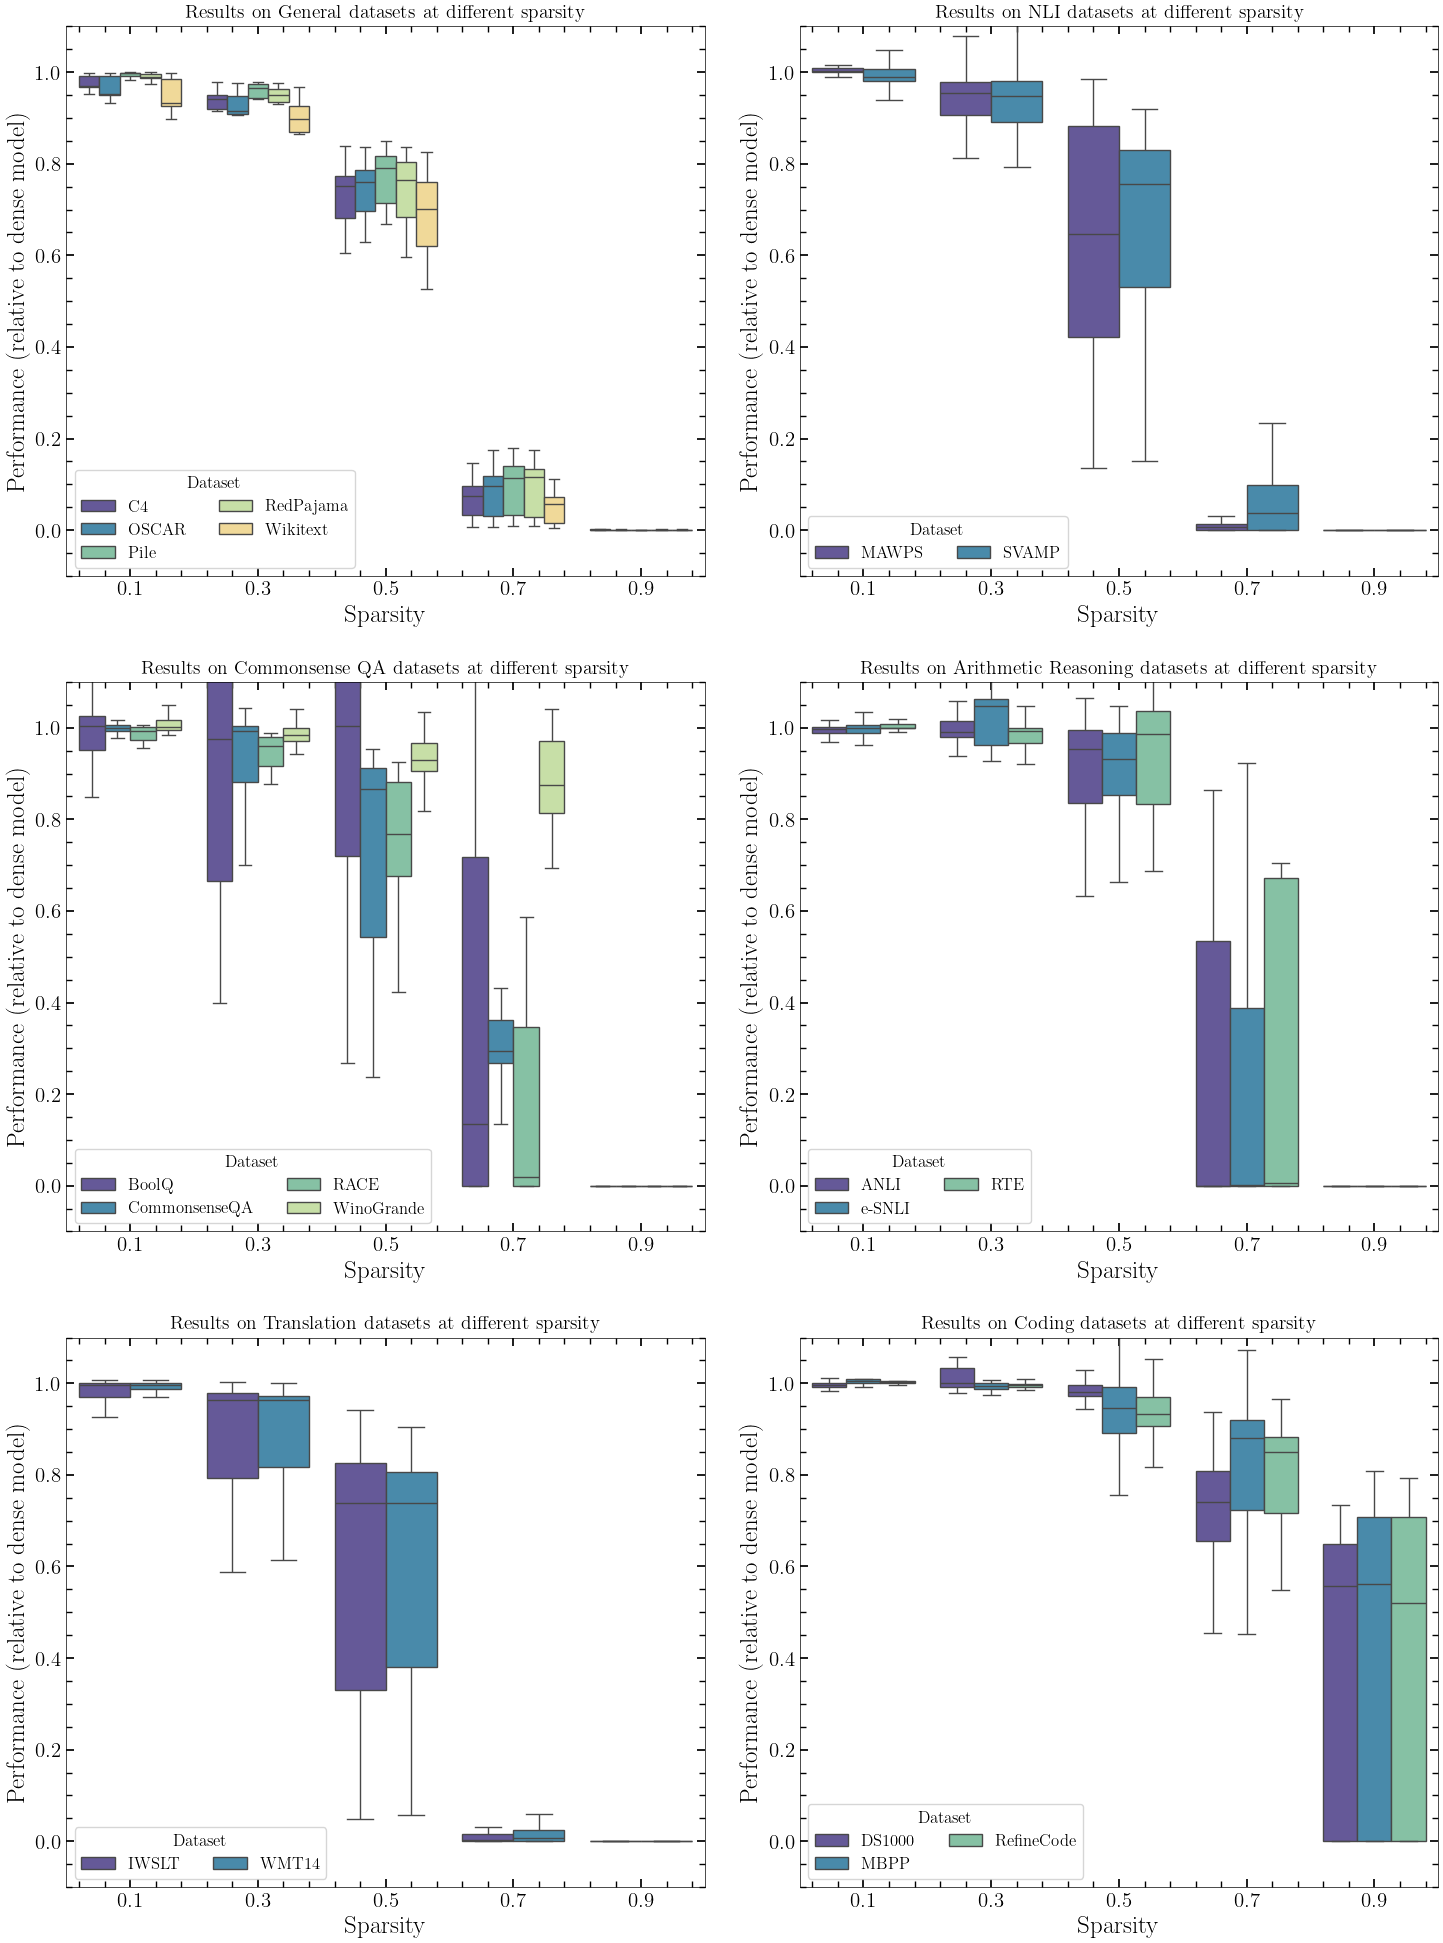

In [9]:


figure, ax_1 = plt.subplots(3, 2, figsize=(15, 20))

#figure.suptitle("Average performance on each dataset at different sparsity levels", fontsize=16)


processed_data_only_sparse = processed_data[processed_data['sparsity'] > 0]

sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'Language Modeling'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[0, 0], showfliers=False) #No outliers
ax_1[0, 0].set_title("Results on General datasets at different sparsity", fontsize=14)
#ax_1[0].set_yscale('log') # Set y-axis limits for better visibility
ax_1[0, 0].set_ylabel("Performance (relative to dense model)")
ax_1[0, 0].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_1[0, 0].set_xlabel("Sparsity")
ax_1[0, 0].legend(title="Dataset", loc='lower left', fontsize=12, ncol=2, frameon=True)

sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'Mathematical Reasoning'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[0, 1], showfliers=False) #No outliers
ax_1[0, 1].set_title("Results on NLI datasets at different sparsity", fontsize=14)
ax_1[0, 1].set_ylabel("Performance (relative to dense model)")
ax_1[0, 1].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_1[0, 1].set_xlabel("Sparsity")
ax_1[0, 1].legend(title="Dataset", loc='lower left', fontsize=12, ncol=2, frameon=True)


sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'Question Answering'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[1, 0], showfliers=False) #No outliers
figure.tight_layout(pad=2.0)
ax_1[1, 0].set_title("Results on Commonsense QA datasets at different sparsity", fontsize=14)
ax_1[1, 0].set_ylabel("Performance (relative to dense model)")
ax_1[1, 0].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_1[1, 0].set_xlabel("Sparsity")
ax_1[1, 0].legend(title="Dataset", loc='lower left', fontsize=12, ncol=2, frameon=True)



sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'NLI'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[1, 1], showfliers=False) #No outliers
ax_1[1, 1].set_title("Results on Arithmetic Reasoning datasets at different sparsity", fontsize=14)
ax_1[1, 1].set_ylabel("Performance (relative to dense model)")
ax_1[1, 1].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_1[1, 1].set_xlabel("Sparsity")
ax_1[1, 1].legend(title="Dataset", loc='lower left', fontsize=12, ncol=2, frameon=True)


sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'Translation'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[2, 0], showfliers=False) #No outliers
ax_1[2, 0].set_title("Results on Translation datasets at different sparsity", fontsize=14)
ax_1[2, 0].set_ylabel("Performance (relative to dense model)")
ax_1[2, 0].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_1[2, 0].set_xlabel("Sparsity")
ax_1[2, 0].legend(title="Dataset", loc='lower left', fontsize=12, ncol=2, frameon=True)


sns.boxplot(data=processed_data_only_sparse[processed_data_only_sparse['dataset_group'] == 'Coding'], x='sparsity', y='percentage', hue='dataset', palette=custom_palette, ax=ax_1[2, 1], showfliers=False) #No outliers
ax_1[2, 1].set_title("Results on Coding datasets at different sparsity", fontsize=14)
ax_1[2, 1].set_ylabel("Performance (relative to dense model)")
ax_1[2, 1].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_1[2, 1].set_xlabel("Sparsity")
ax_1[2, 1].legend(title="Dataset", loc='lower left', fontsize=12, ncol=2, frameon=True)


figure.tight_layout(pad=2.0)

In [10]:
"""figure_2, ax_2 = plt.subplots(3, figsize=(15, 20))
figure_2.suptitle("Average performance obtained by pruning using a specific dataset at different sparsity levels", fontsize=16)


sns.boxplot(data=processed_data[processed_data['sparsity'] == 0.1], x='pruning_data', y='percentage', palette=custom_palette, ax=ax_2[0], showfliers=False) #No outliers
ax_2[0].set_xticklabels(ax_2[0].get_xticklabels(), rotation=45, ha='center')
ax_2[0].set_title("Results on pruning with sparsity 0.1", fontsize=14)
ax_2[0].set_ylabel("Performance (relative to dense model)")
ax_2[0].set_xlabel("Pruning Data")
ax_2[0].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility

sns.boxplot(data=processed_data[processed_data['sparsity'] == 0.3], x='pruning_data', y='percentage', palette=custom_palette, ax=ax_2[1], showfliers=False) #No outliers
ax_2[1].set_xticklabels(ax_2[1].get_xticklabels(), rotation=45, ha='center')
ax_2[1].set_title("Results on pruning with sparsity 0.3", fontsize=14)
ax_2[1].set_ylabel("Performance (relative to dense model)")
ax_2[1].set_xlabel("Pruning Data")
ax_2[1].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility

sns.boxplot(data=processed_data[processed_data['sparsity'] == 0.5], x='pruning_data', y='percentage', palette=custom_palette, ax=ax_2[2], showfliers=False) #No outliers
ax_2[2].set_xticklabels(ax_2[2].get_xticklabels(), rotation=45, ha='center')
ax_2[2].set_title("Results on pruning with sparsity 0.5", fontsize=14)
ax_2[2].set_ylabel("Performance (relative to dense model)")
ax_2[2].set_xlabel("Pruning Data")
ax_2[2].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility

figure_2.tight_layout(pad=2.0)


figure_2, ax_2 = plt.subplots(2, figsize=(15, 20))
sns.boxplot(data=processed_data[processed_data['sparsity'] == 0.7], x='pruning_data', y='percentage', palette=custom_palette, ax=ax_2[0], showfliers=False) #No outliers
ax_2[0].set_title("Results on pruning with sparsity 0.7", fontsize=14)
ax_2[0].set_xticklabels(ax_2[0].get_xticklabels(), rotation=45, ha='center')
ax_2[0].set_ylabel("Performance (relative to dense model)")
ax_2[0].set_xlabel("Pruning Data")
ax_2[0].set_ylim(-0.1, 1.1) #



sns.boxplot(data=processed_data[processed_data['sparsity'] == 0.9], x='pruning_data', y='percentage', palette=custom_palette, ax=ax_2[1], showfliers=False) #No outliers
ax_2[1].set_title("Results on pruning with sparsity 0.9", fontsize=14)
ax_2[1].set_xticklabels(ax_2[1].get_xticklabels(), rotation=45, ha='center')
ax_2[1].set_ylabel("Performance (relative to dense model)")
ax_2[1].set_xlabel("Pruning Data")
ax_2[1].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility

figure_2.tight_layout(pad=2.0)
"""

'figure_2, ax_2 = plt.subplots(3, figsize=(15, 20))\nfigure_2.suptitle("Average performance obtained by pruning using a specific dataset at different sparsity levels", fontsize=16)\n\n\nsns.boxplot(data=processed_data[processed_data[\'sparsity\'] == 0.1], x=\'pruning_data\', y=\'percentage\', palette=custom_palette, ax=ax_2[0], showfliers=False) #No outliers\nax_2[0].set_xticklabels(ax_2[0].get_xticklabels(), rotation=45, ha=\'center\')\nax_2[0].set_title("Results on pruning with sparsity 0.1", fontsize=14)\nax_2[0].set_ylabel("Performance (relative to dense model)")\nax_2[0].set_xlabel("Pruning Data")\nax_2[0].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility\n\nsns.boxplot(data=processed_data[processed_data[\'sparsity\'] == 0.3], x=\'pruning_data\', y=\'percentage\', palette=custom_palette, ax=ax_2[1], showfliers=False) #No outliers\nax_2[1].set_xticklabels(ax_2[1].get_xticklabels(), rotation=45, ha=\'center\')\nax_2[1].set_title("Results on pruning with sparsity 0.3", fo

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/1910397250.py:5: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.boxplot(data=processed_data, x='pruning_data', y='percentage', hue="sparsity", palette=custom_palette, ax=ax_2, showfliers=False) #No outliers
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/1910397250.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_2.set_xticklabels(ax_2.get_xticklabels(), rotation=45, ha='center')


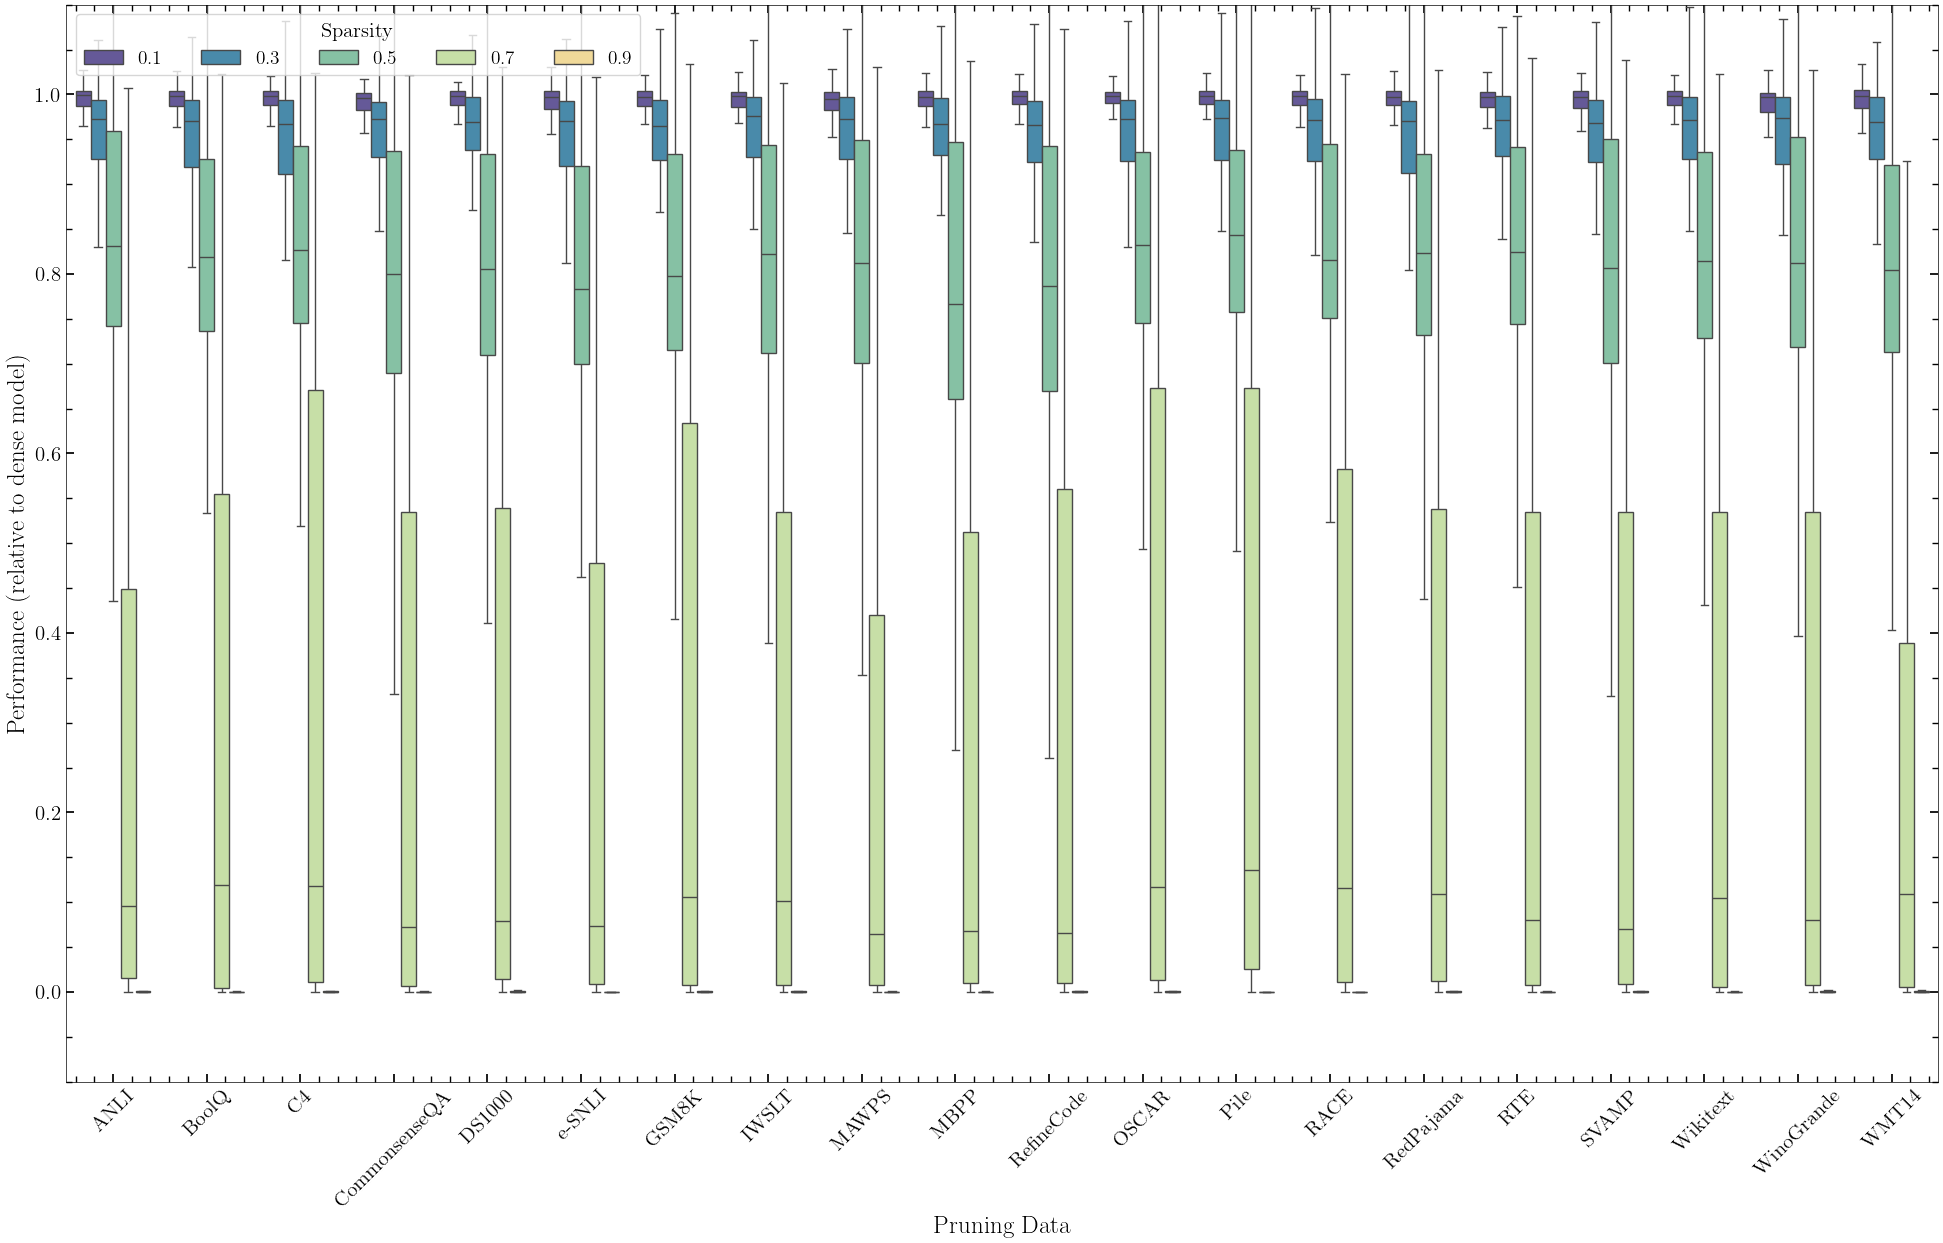

In [11]:
figure_2, ax_2 = plt.subplots(figsize=(20, 13))
#figure_2.suptitle("Average performance obtained by pruning using a specific dataset at different sparsity levels", fontsize=16)


sns.boxplot(data=processed_data, x='pruning_data', y='percentage', hue="sparsity", palette=custom_palette, ax=ax_2, showfliers=False) #No outliers
ax_2.set_xticklabels(ax_2.get_xticklabels(), rotation=45, ha='center')
ax_2.set_ylabel("Performance (relative to dense model)")
ax_2.set_xlabel("Pruning Data")
ax_2.set_ylim(-0.1, 1.1) # Set y-axis
ax_2.legend(title="Sparsity", title_fontsize=15, loc='upper left', fontsize=14, ncol=5, frameon=True)


figure_2.tight_layout(pad=2.0)


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/3220420906.py:6: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.boxplot(data=processed_data, x='sparsity', y='percentage', hue='dataset_group', palette=custom_palette, ax=ax_3[0], showfliers=False, hue_order=pruning_groups)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/3220420906.py:13: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.boxplot(data=processed_data, x='sparsity', y='percentage', hue='pruning_group', palette=custom_palette, ax=ax_3[1], showfliers=False, hue_order=pruning_groups)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/3220420906.py:20: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.boxplot(data=processed_data, x='sparsity', y='percentage', hue='model', palette=custom_palette, ax=ax_3[2], showfliers=False)


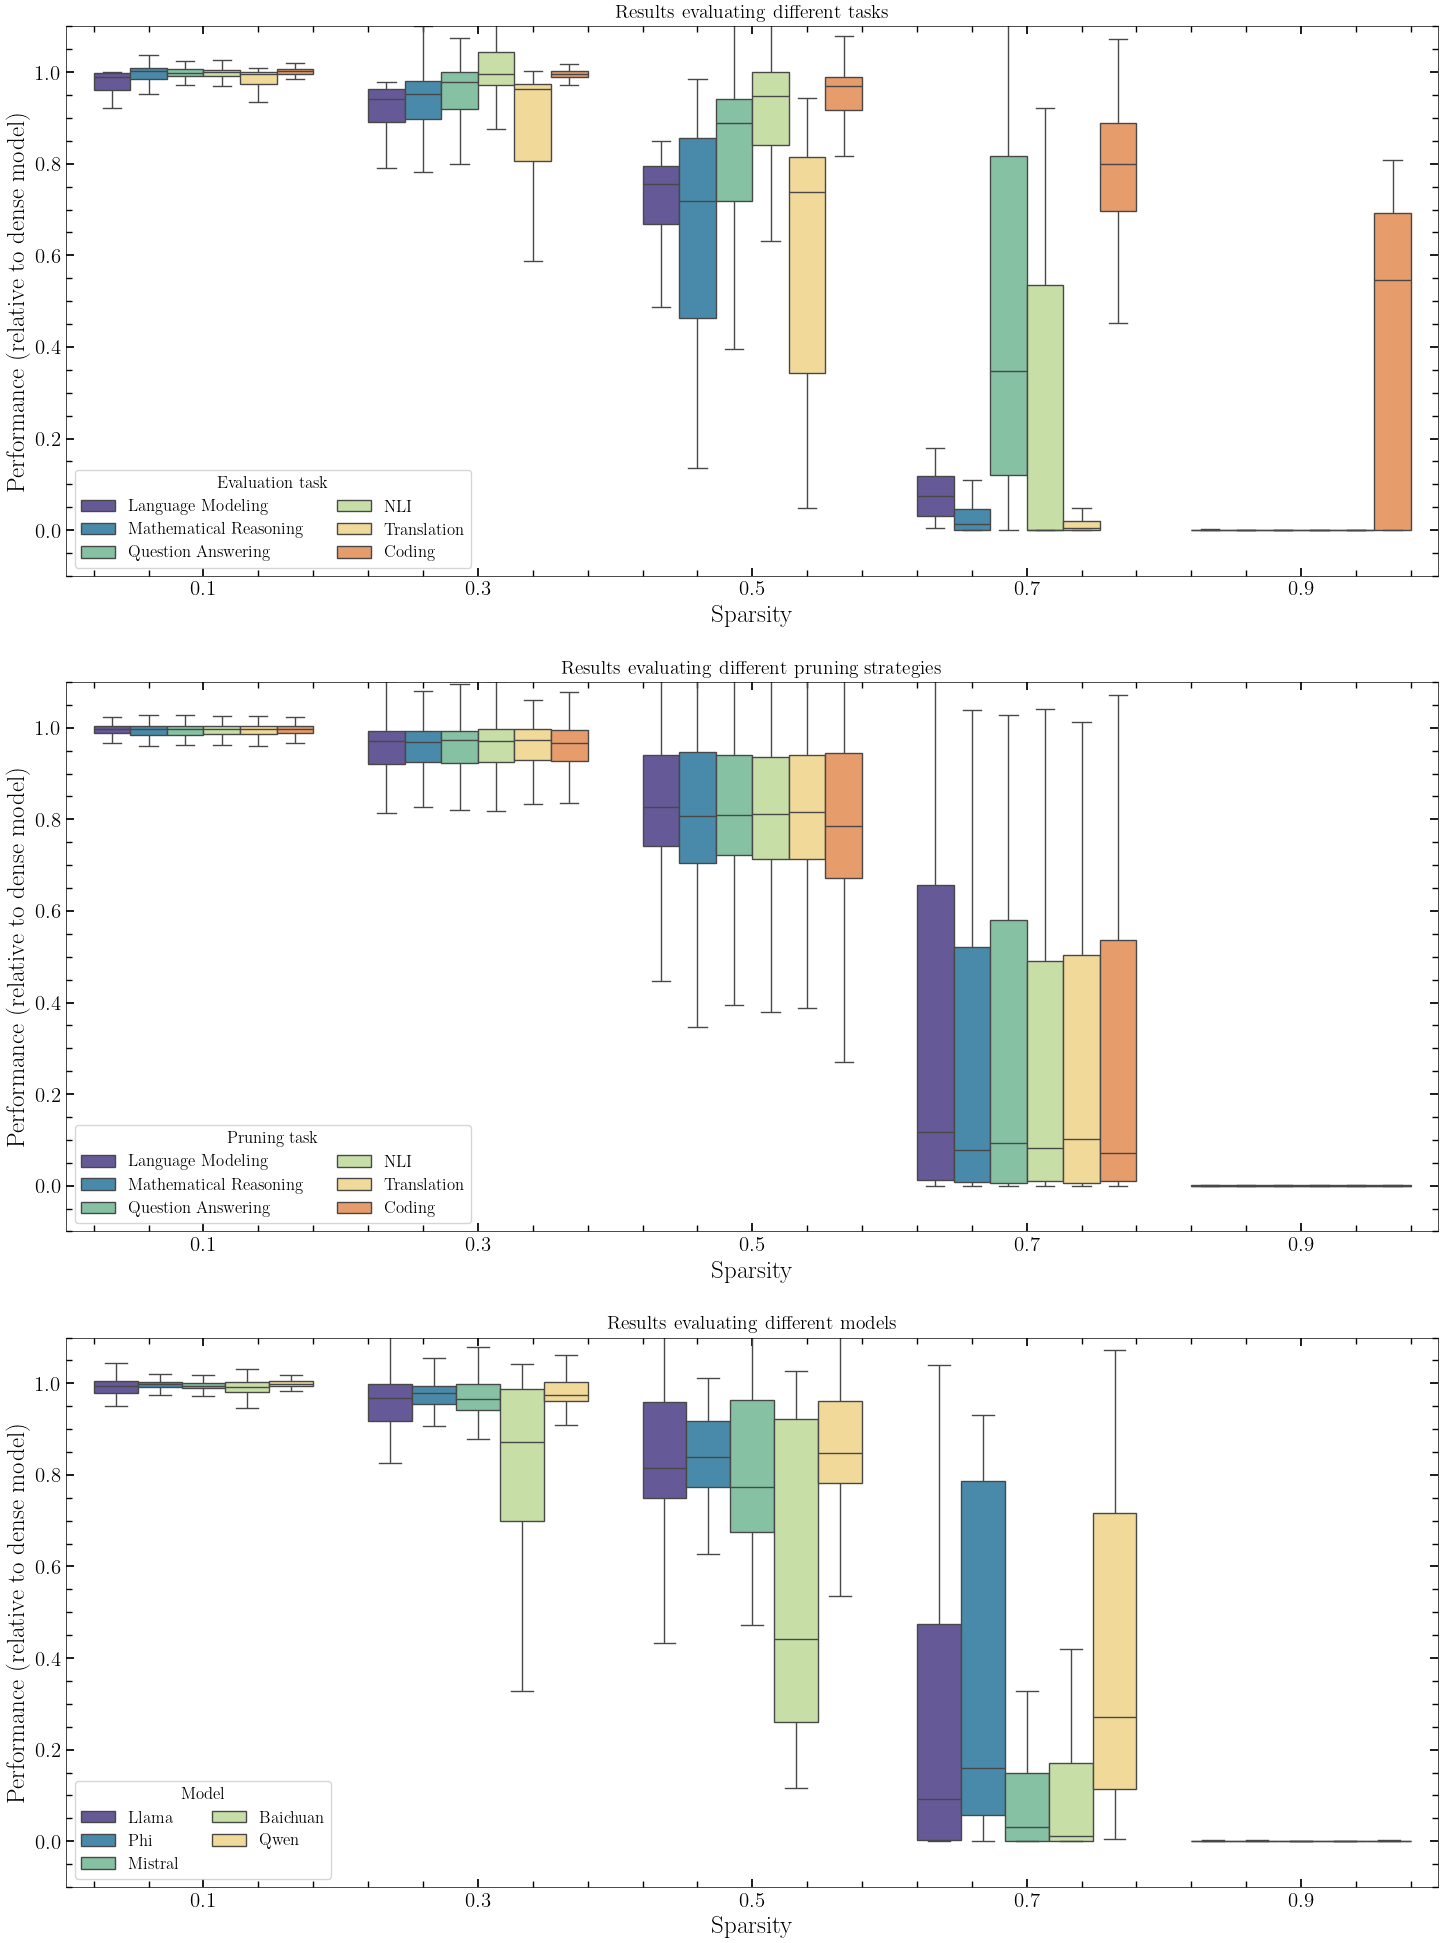

In [12]:
figure_3, ax_3 = plt.subplots(3, figsize=(15, 20))

#figure_3.suptitle("Average performance on each dataset at different sparsity levels", fontsize=16)


sns.boxplot(data=processed_data, x='sparsity', y='percentage', hue='dataset_group', palette=custom_palette, ax=ax_3[0], showfliers=False, hue_order=pruning_groups)
ax_3[0].set_title("Results evaluating different tasks", fontsize=14)
ax_3[0].set_ylabel("Performance (relative to dense model)")
ax_3[0].set_xlabel("Sparsity")
ax_3[0].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_3[0].legend(title="Evaluation task", loc='lower left', fontsize=12, ncol=2, frameon=True)

sns.boxplot(data=processed_data, x='sparsity', y='percentage', hue='pruning_group', palette=custom_palette, ax=ax_3[1], showfliers=False, hue_order=pruning_groups)
ax_3[1].set_title("Results evaluating different pruning strategies", fontsize=14)
ax_3[1].set_ylabel("Performance (relative to dense model)")
ax_3[1].set_xlabel("Sparsity")
ax_3[1].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_3[1].legend(title="Pruning task", loc='lower left', fontsize=12, ncol=2, frameon=True)

sns.boxplot(data=processed_data, x='sparsity', y='percentage', hue='model', palette=custom_palette, ax=ax_3[2], showfliers=False)
ax_3[2].set_title("Results evaluating different models", fontsize=14)
ax_3[2].set_ylabel("Performance (relative to dense model)")
ax_3[2].set_xlabel("Sparsity")
ax_3[2].set_ylim(-0.1, 1.1) # Set y-axis limits for better visibility
ax_3[2].legend(title="Model", loc='lower left', fontsize=12, ncol=2, frameon=True)


#sns.boxplot(data=processed_data, x='sparsity', y='percentage', hue='model', palette=custom_palette, ax=ax_3[2])
#ax_3[2].set_yscale('log') # Set y-axis limits for better visibility

figure_3.tight_layout(pad=2.0)



In [13]:
"""figure_4, ax_4 = plt.subplots(3, figsize=(15, 20))

sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.1], x='pruning_group', y='percentage', hue='dataset_group', palette=custom_palette, ax=ax_4[0], showfliers=False)
#ax_3[0].set_yscale('log') # Set y-axis limits for better visibility


sns.boxplot(data=processed_data, x='dataset_group', y='percentage', hue='sparsity', palette=custom_palette, ax=ax_4[1], showfliers=False)


sns.boxplot(data=processed_data, x='sparsity', y='percentage', hue='model', palette=custom_palette, ax=ax_4[2], showfliers=False)
#ax_3[1].set_yscale('log') # Set y-axis limits for better visibility


#sns.boxplot(data=processed_data, x='sparsity', y='percentage', hue='model', palette=custom_palette, ax=ax_3[2])
#ax_3[2].set_yscale('log') # Set y-axis limits for better visibility
"""

'figure_4, ax_4 = plt.subplots(3, figsize=(15, 20))\n\nsns.boxplot(data=processed_data[processed_data["sparsity"] == 0.1], x=\'pruning_group\', y=\'percentage\', hue=\'dataset_group\', palette=custom_palette, ax=ax_4[0], showfliers=False)\n#ax_3[0].set_yscale(\'log\') # Set y-axis limits for better visibility\n\n\nsns.boxplot(data=processed_data, x=\'dataset_group\', y=\'percentage\', hue=\'sparsity\', palette=custom_palette, ax=ax_4[1], showfliers=False)\n\n\nsns.boxplot(data=processed_data, x=\'sparsity\', y=\'percentage\', hue=\'model\', palette=custom_palette, ax=ax_4[2], showfliers=False)\n#ax_3[1].set_yscale(\'log\') # Set y-axis limits for better visibility\n\n\n#sns.boxplot(data=processed_data, x=\'sparsity\', y=\'percentage\', hue=\'model\', palette=custom_palette, ax=ax_3[2])\n#ax_3[2].set_yscale(\'log\') # Set y-axis limits for better visibility\n'

In [14]:
"""figure_4, ax_4 = plt.subplots(3, 2, figsize=(15, 20))


sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.0], x='pruning_group', y='percentage', hue='dataset_group', palette=custom_palette, ax=ax_4[0, 0], showfliers=False)

sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.1], x='pruning_group', y='percentage', hue='dataset_group', palette=custom_palette, ax=ax_4[0, 1], showfliers=False)

sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.3], x='pruning_group', y='percentage', hue='dataset_group', palette=custom_palette, ax=ax_4[1, 0], showfliers=False)

sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.5], x='pruning_group', y='percentage', hue='dataset_group', palette=custom_palette, ax=ax_4[1, 1], showfliers=False)

sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.7], x='pruning_group', y='percentage', hue='dataset_group', palette=custom_palette, ax=ax_4[2, 0], showfliers=False)

sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.9], x='pruning_group', y='percentage', hue='dataset_group', palette=custom_palette, ax=ax_4[2, 1], showfliers=False)


"""

'figure_4, ax_4 = plt.subplots(3, 2, figsize=(15, 20))\n\n\nsns.boxplot(data=processed_data[processed_data["sparsity"] == 0.0], x=\'pruning_group\', y=\'percentage\', hue=\'dataset_group\', palette=custom_palette, ax=ax_4[0, 0], showfliers=False)\n\nsns.boxplot(data=processed_data[processed_data["sparsity"] == 0.1], x=\'pruning_group\', y=\'percentage\', hue=\'dataset_group\', palette=custom_palette, ax=ax_4[0, 1], showfliers=False)\n\nsns.boxplot(data=processed_data[processed_data["sparsity"] == 0.3], x=\'pruning_group\', y=\'percentage\', hue=\'dataset_group\', palette=custom_palette, ax=ax_4[1, 0], showfliers=False)\n\nsns.boxplot(data=processed_data[processed_data["sparsity"] == 0.5], x=\'pruning_group\', y=\'percentage\', hue=\'dataset_group\', palette=custom_palette, ax=ax_4[1, 1], showfliers=False)\n\nsns.boxplot(data=processed_data[processed_data["sparsity"] == 0.7], x=\'pruning_group\', y=\'percentage\', hue=\'dataset_group\', palette=custom_palette, ax=ax_4[2, 0], showfliers=

In [15]:
"""figure_4, ax_4 = plt.subplots(3, 2, figsize=(15, 20))


sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.0], x='dataset_group', y='percentage', hue='pruning_group', palette=custom_palette, ax=ax_4[0, 0], showfliers=False)

sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.1], x='dataset_group', y='percentage', hue='pruning_group', palette=custom_palette, ax=ax_4[0, 1], showfliers=False)

sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.3], x='dataset_group', y='percentage', hue='pruning_group', palette=custom_palette, ax=ax_4[1, 0], showfliers=False)

sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.5], x='dataset_group', y='percentage', hue='pruning_group', palette=custom_palette, ax=ax_4[1, 1], showfliers=False)

sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.7], x='dataset_group', y='percentage', hue='pruning_group', palette=custom_palette, ax=ax_4[2, 0], showfliers=False)

sns.boxplot(data=processed_data[processed_data["sparsity"] == 0.9], x='dataset_group', y='percentage', hue='pruning_group', palette=custom_palette, ax=ax_4[2, 1], showfliers=False)


"""

'figure_4, ax_4 = plt.subplots(3, 2, figsize=(15, 20))\n\n\nsns.boxplot(data=processed_data[processed_data["sparsity"] == 0.0], x=\'dataset_group\', y=\'percentage\', hue=\'pruning_group\', palette=custom_palette, ax=ax_4[0, 0], showfliers=False)\n\nsns.boxplot(data=processed_data[processed_data["sparsity"] == 0.1], x=\'dataset_group\', y=\'percentage\', hue=\'pruning_group\', palette=custom_palette, ax=ax_4[0, 1], showfliers=False)\n\nsns.boxplot(data=processed_data[processed_data["sparsity"] == 0.3], x=\'dataset_group\', y=\'percentage\', hue=\'pruning_group\', palette=custom_palette, ax=ax_4[1, 0], showfliers=False)\n\nsns.boxplot(data=processed_data[processed_data["sparsity"] == 0.5], x=\'dataset_group\', y=\'percentage\', hue=\'pruning_group\', palette=custom_palette, ax=ax_4[1, 1], showfliers=False)\n\nsns.boxplot(data=processed_data[processed_data["sparsity"] == 0.7], x=\'dataset_group\', y=\'percentage\', hue=\'pruning_group\', palette=custom_palette, ax=ax_4[2, 0], showfliers=

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/3061590138.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] != 0.9].pivot_table(index='dataset_group', columns='pruning_group', values='percentage_wrt_task', aggfunc='mean')# .sort_index(level=0, ascending=True, inplace=True)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/3061590138.py:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] == 0.1].pivot_table(index='dataset_group', columns='pruning_group', values='percentage_wrt_task', aggfunc='m

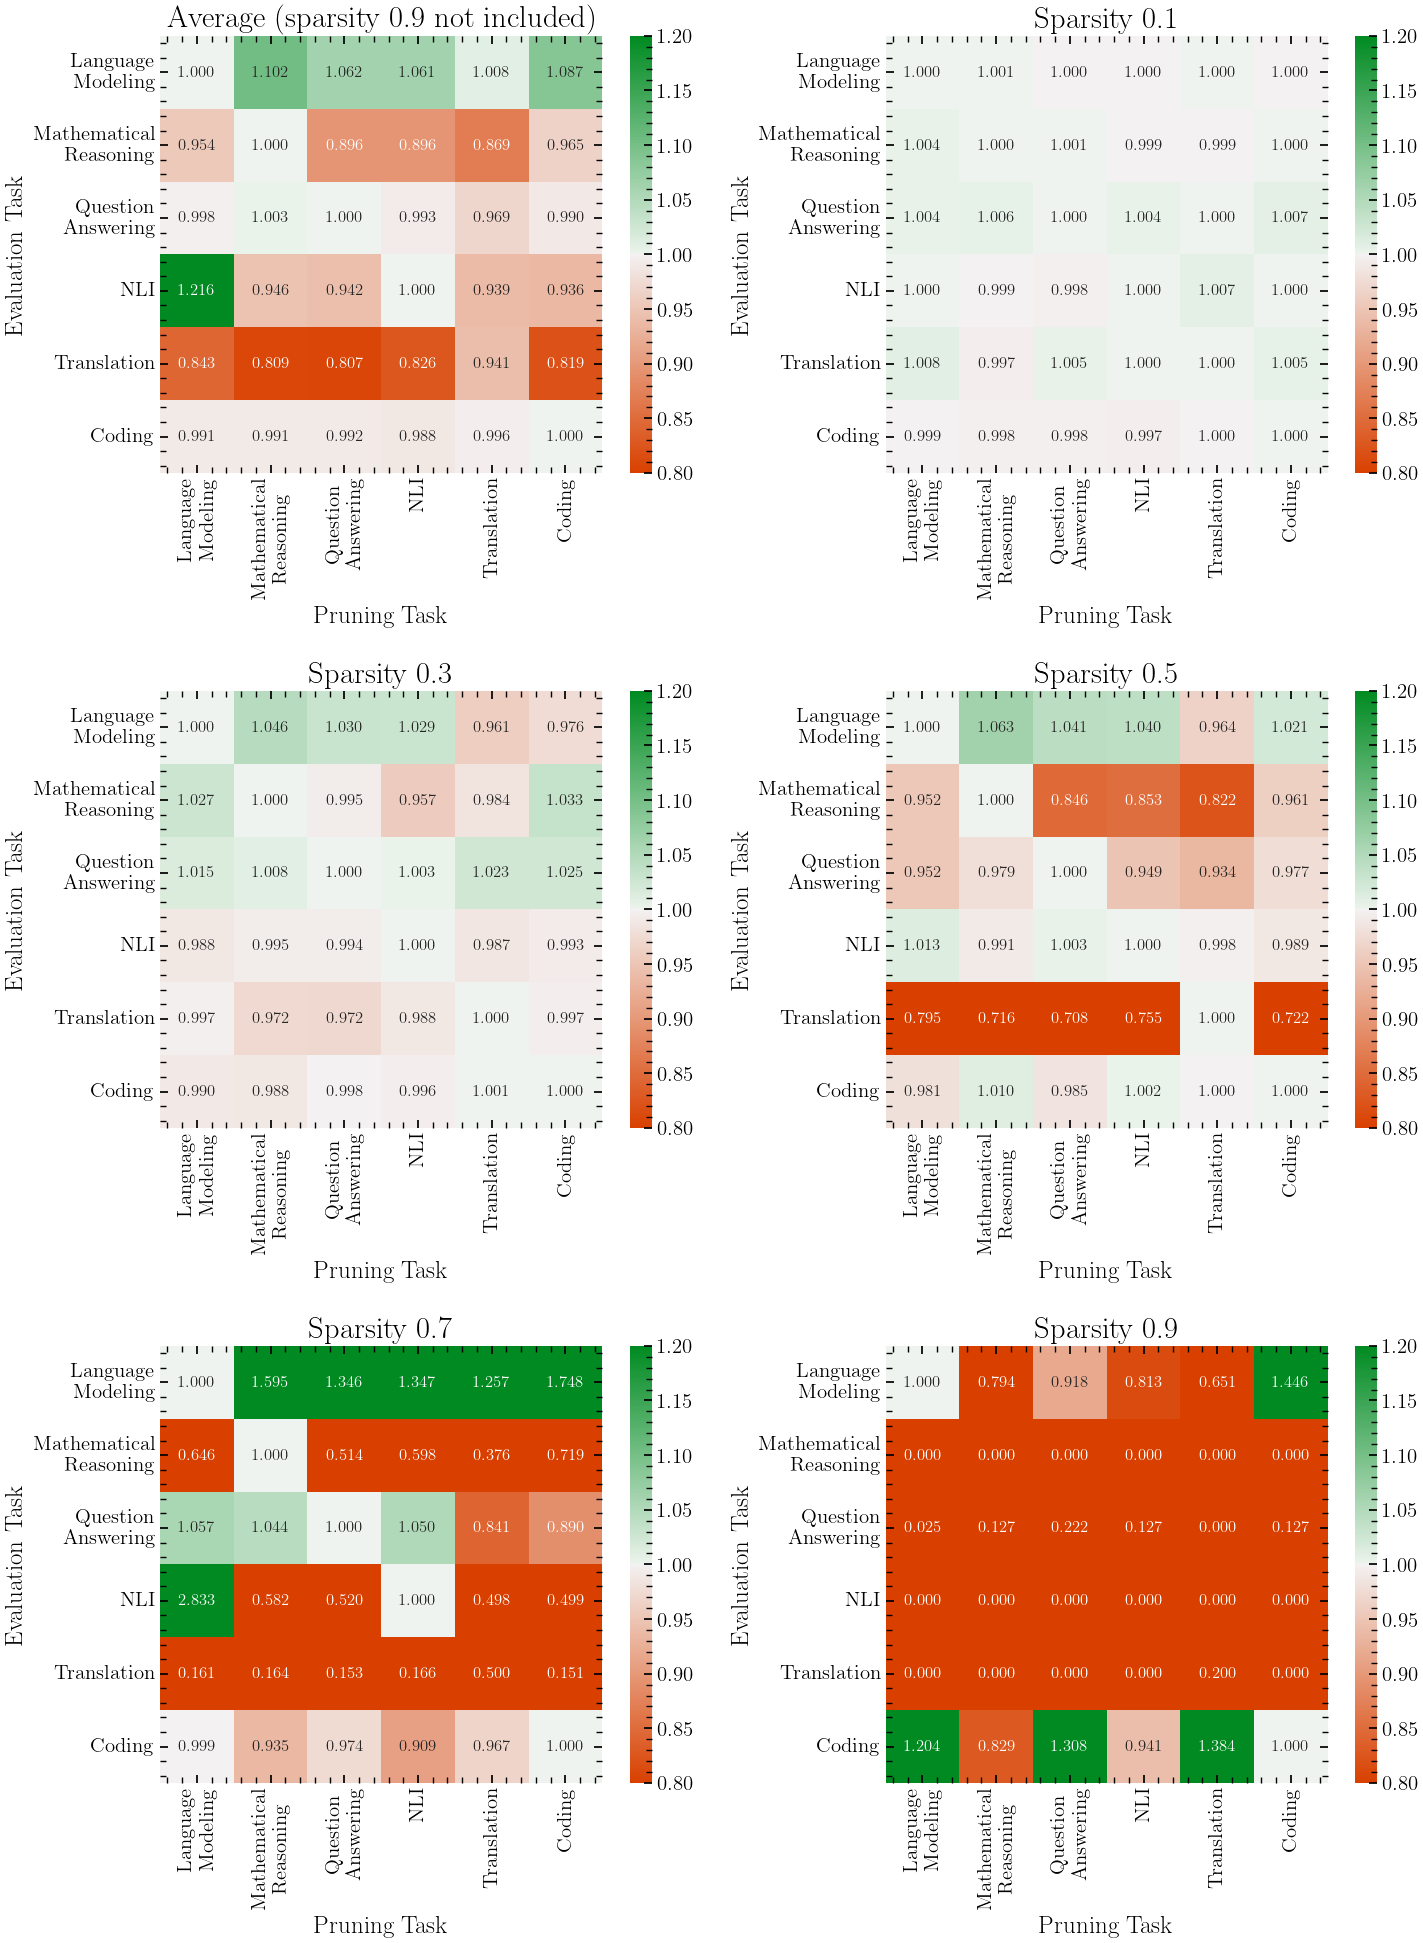

In [16]:
figure_4, ax_4 = plt.subplots(3, 2, figsize=(15, 20))
processed_data_heatmap = processed_data.copy()

diversing_palette = sns.diverging_palette(18, 130, s=100, l=50, as_cmap=True)

v_min = 0.8
v_max = 1.2

#processed_data_heatmap = processed_data_heatmap[processed_data_heatmap["model"] == 'meta-llama/Llama-2-7b-hf']
#processed_data_heatmap = processed_data_heatmap[processed_data_heatmap['pruning_data'] != 'gsm8k'] #Attualmente non ha valori sensati

processed_data_heatmap['dataset_group'] = pd.Categorical(processed_data_heatmap['dataset_group'], categories=['Language Modeling', 'Mathematical Reasoning', 'Question Answering', 'NLI',  'Translation', 'Coding']) #, 'dense'])
processed_data_heatmap['pruning_group'] = pd.Categorical(processed_data_heatmap['pruning_group'], categories=['Language Modeling', 'Mathematical Reasoning', 'Question Answering', 'NLI',  'Translation', 'Coding']) #, 'dense'])


processed_data_heatmap = processed_data_heatmap[~((processed_data_heatmap['model'] == 'Baichuan') & (processed_data_heatmap['sparsity'] == 0.7))]
processed_data_heatmap = processed_data_heatmap[~((processed_data_heatmap['model'] == 'Phi') & (processed_data_heatmap['sparsity'] == 0.7))]
processed_data_heatmap = processed_data_heatmap[~((processed_data_heatmap['model'] == 'Llama') & (processed_data_heatmap['sparsity'] == 0.7))]

#figure_4.suptitle("Average performance obtained on a certain task by pruning using different datasets category", fontsize=16)


data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] != 0.9].pivot_table(index='dataset_group', columns='pruning_group', values='percentage_wrt_task', aggfunc='mean')# .sort_index(level=0, ascending=True, inplace=True)
sns.heatmap(data_pivot, annot=True, fmt=".3f", cmap=diversing_palette, ax=ax_4[0, 0], vmin=v_min, vmax=v_max) #-0.1, 1.1, 
ax_4[0, 0].set_title("Average (sparsity 0.9 not included)")
ax_4[0, 0].set_ylabel("Evaluation Task")
ax_4[0, 0].set_xlabel("Pruning Task")
ax_4[0, 0].set_xticklabels([label.get_text().replace(" ", "\n") for label in ax_4[0, 0].get_xticklabels()], rotation=90, ha="center") #split e vai a capo se c'è uno spazio
ax_4[0, 0].set_yticklabels([label.get_text().replace(" ", "\n") for label in ax_4[0, 0].get_yticklabels()]) #split e vai a capo se c'è uno spazio

data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] == 0.1].pivot_table(index='dataset_group', columns='pruning_group', values='percentage_wrt_task', aggfunc='mean')#.reset_index()
sns.heatmap(data_pivot, annot=True, fmt=".3f", cmap=diversing_palette, ax=ax_4[0, 1], vmin=v_min, vmax=v_max)
ax_4[0, 1].set_title("Sparsity 0.1")
ax_4[0, 1].set_ylabel("Evaluation Task")
ax_4[0, 1].set_xlabel("Pruning Task")
ax_4[0, 1].set_xticklabels([label.get_text().replace(" ", "\n") for label in ax_4[0, 1].get_xticklabels()], rotation=90, ha="center") #split e vai a capo se c'è uno spazio
ax_4[0, 1].set_yticklabels([label.get_text().replace(" ", "\n") for label in ax_4[0, 1].get_yticklabels()]) #split e vai a capo se c'è uno spazio


data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] == 0.3].pivot_table(index='dataset_group', columns='pruning_group', values='percentage_wrt_task', aggfunc='mean')#.reset_index()
sns.heatmap(data_pivot, annot=True, fmt=".3f", cmap=diversing_palette, ax=ax_4[1, 0], vmin=v_min, vmax=v_max)
ax_4[1, 0].set_title("Sparsity 0.3")
ax_4[1, 0].set_ylabel("Evaluation Task")
ax_4[1, 0].set_xlabel("Pruning Task")
ax_4[1, 0].set_xticklabels([label.get_text().replace(" ", "\n") for label in ax_4[1, 0].get_xticklabels()], rotation=90, ha="center") #split e vai a capo se c'è uno spazio
ax_4[1, 0].set_yticklabels([label.get_text().replace(" ", "\n") for label in ax_4[1, 0].get_yticklabels()]) #split e vai a capo se c'è uno spazio




data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] == 0.5].pivot_table(index='dataset_group', columns='pruning_group', values='percentage_wrt_task', aggfunc='mean')#.reset_index()
sns.heatmap(data_pivot, annot=True, fmt=".3f", cmap=diversing_palette, ax=ax_4[1, 1], vmin=v_min, vmax=v_max)
ax_4[1, 1].set_title("Sparsity 0.5")
ax_4[1, 1].set_ylabel("Evaluation Task")
ax_4[1, 1].set_xlabel("Pruning Task")
ax_4[1, 1].set_xticklabels([label.get_text().replace(" ", "\n") for label in ax_4[1, 1].get_xticklabels()], rotation=90, ha="center") #split e vai a capo se c'è uno spazio
ax_4[1, 1].set_yticklabels([label.get_text().replace(" ", "\n") for label in ax_4[1, 1].get_yticklabels()]) #split e vai a capo se c'è uno spazio


data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] == 0.7].pivot_table(index='dataset_group', columns='pruning_group', values='percentage_wrt_task', aggfunc='mean')#.reset_index()
sns.heatmap(data_pivot, annot=True, fmt=".3f", cmap=diversing_palette, ax=ax_4[2, 0], vmin=v_min, vmax=v_max)
ax_4[2, 0].set_title("Sparsity 0.7")
ax_4[2, 0].set_ylabel("Evaluation Task")
ax_4[2, 0].set_xlabel("Pruning Task")
ax_4[2, 0].set_xticklabels(ax_4[1, 1].get_xticklabels(), rotation=45, ha="center")
ax_4[2, 0].set_yticklabels([label.get_text().replace(" ", "\n") for label in ax_4[2, 0].get_yticklabels()]) #split e vai a capo se c'è uno spazio
ax_4[2, 0].set_xticklabels([label.get_text().replace(" ", "\n") for label in ax_4[2, 0].get_xticklabels()], rotation=90, ha="center") #split e vai a capo se c'è uno spazio


data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] == 0.9].pivot_table(index='dataset_group', columns='pruning_group', values='percentage_wrt_task', aggfunc='mean')#.reset_index()
sns.heatmap(data_pivot, annot=True, fmt=".3f", cmap=diversing_palette, ax=ax_4[2, 1], vmin=v_min, vmax=v_max) #, vmin=-0.1, vmax=1.1)
ax_4[2, 1].set_title("Sparsity 0.9")
ax_4[2, 1].set_ylabel("Evaluation Task")
ax_4[2, 1].set_xlabel("Pruning Task")
ax_4[2, 1].set_xticklabels([label.get_text().replace(" ", "\n") for label in ax_4[2, 1].get_xticklabels()], rotation=90, ha="center") #split e vai a capo se c'è uno spazio
ax_4[2, 1].set_yticklabels([label.get_text().replace(" ", "\n") for label in ax_4[2, 1].get_yticklabels()]) #split e vai a capo se c'è uno spazio
#

#ax_4[2, 1].axis('off')

figure_4.tight_layout(pad=2.0)



In [17]:
"""figure_4, ax_4 = plt.subplots(3, 2, figsize=(15, 20))
processed_data_heatmap = processed_data.copy()

#processed_data_heatmap = processed_data_heatmap[processed_data_heatmap["model"] == 'meta-llama/Llama-2-7b-hf']
#processed_data_heatmap = processed_data_heatmap[processed_data_heatmap['pruning_data'] != 'gsm8k'] #Attualmente non ha valori sensati

processed_data_heatmap['dataset_group'] = pd.Categorical(processed_data_heatmap['dataset_group'], categories=['Language Modeling', 'Mathematical Reasoning', 'Question Answering', 'NLI',  'Translation', 'Coding']) #, 'dense'])
processed_data_heatmap['pruning_group'] = pd.Categorical(processed_data_heatmap['pruning_group'], categories=['Language Modeling', 'Mathematical Reasoning', 'Question Answering', 'NLI',  'Translation', 'Coding']) #, 'dense'])


processed_data_heatmap = processed_data_heatmap[~((processed_data_heatmap['model'] == 'Baichuan') & (processed_data_heatmap['sparsity'] == 0.7))]
processed_data_heatmap = processed_data_heatmap[~((processed_data_heatmap['model'] == 'Phi') & (processed_data_heatmap['sparsity'] == 0.7))]
processed_data_heatmap = processed_data_heatmap[~((processed_data_heatmap['model'] == 'Llama') & (processed_data_heatmap['sparsity'] == 0.7))]

figure_4.suptitle("Average performance obtained on a certain task by pruning using different datasets category", fontsize=16)

data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] != 0.9].pivot_table(index='dataset_group', columns='pruning_group', values='percentage', aggfunc='mean')# .sort_index(level=0, ascending=True, inplace=True)
sns.heatmap(data_pivot, annot=True, fmt=".3f", cmap="Blues", ax=ax_4[0, 0], vmin=-0.1, vmax=1.1) #-0.1, 1.1, 
ax_4[0, 0].set_title("Average across sparsity")
ax_4[0, 0].set_ylabel("Evaluation Task")
ax_4[0, 0].set_xlabel("Pruning Task")
ax_4[0, 0].set_xticklabels([label.get_text().replace(" ", "\n") for label in ax_4[0, 0].get_xticklabels()], rotation=90, ha="center") #split e vai a capo se c'è uno spazio
ax_4[0, 0].set_yticklabels([label.get_text().replace(" ", "\n") for label in ax_4[0, 0].get_yticklabels()]) #split e vai a capo se c'è uno spazio


data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] == 0.1].pivot_table(index='dataset_group', columns='pruning_group', values='percentage', aggfunc='mean')#.reset_index()
sns.heatmap(data_pivot, annot=True, fmt=".3f", cmap="Blues", ax=ax_4[0, 1], vmin=-0.1, vmax=1.1)
ax_4[0, 1].set_title("Sparsity 0.1")
ax_4[0, 1].set_ylabel("Evaluation Task")
ax_4[0, 1].set_xlabel("Pruning Task")
ax_4[0, 1].set_xticklabels(ax_4[0, 1].get_xticklabels(), rotation=45, ha="center")
ax_4[0, 1].set_yticklabels([label.get_text().replace(" ", "\n") for label in ax_4[0, 1].get_yticklabels()]) #split e vai a capo se c'è uno spazio
ax_4[0, 1].set_xticklabels([label.get_text().replace(" ", "\n") for label in ax_4[0, 1].get_xticklabels()], rotation=90, ha="center") #split e vai a capo se c'è uno spazio

data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] == 0.3].pivot_table(index='dataset_group', columns='pruning_group', values='percentage', aggfunc='mean')#.reset_index()
sns.heatmap(data_pivot, annot=True, fmt=".3f", cmap="Blues", ax=ax_4[1, 0], vmin=-0.1, vmax=1.1)
ax_4[1, 0].set_title("Sparsity 0.3")
ax_4[1, 0].set_ylabel("Evaluation Task")
ax_4[1, 0].set_xlabel("Pruning Task")
ax_4[1, 0].set_yticklabels([label.get_text().replace(" ", "\n") for label in ax_4[1, 0].get_yticklabels()]) #split e vai a capo se c'è uno spazio
ax_4[1, 0].set_xticklabels([label.get_text().replace(" ", "\n") for label in ax_4[1, 0].get_xticklabels()], rotation=90, ha="center") #split e vai a capo se c'è uno spazio

data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] == 0.5].pivot_table(index='dataset_group', columns='pruning_group', values='percentage', aggfunc='mean')#.reset_index()
sns.heatmap(data_pivot, annot=True, fmt=".3f", cmap="Blues", ax=ax_4[1, 1], vmin=-0.1, vmax=1.1)
ax_4[1, 1].set_title("Sparsity 0.5")
ax_4[1, 1].set_ylabel("Evaluation Task")
ax_4[1, 1].set_xlabel("Pruning Task")
ax_4[1, 1].set_yticklabels([label.get_text().replace(" ", "\n") for label in ax_4[1, 1].get_yticklabels()]) #split e vai a capo se c'è uno spazio
ax_4[1, 1].set_xticklabels([label.get_text().replace(" ", "\n") for label in ax_4[1, 1].get_xticklabels()], rotation=90, ha="center") #split e vai a capo se c'è uno spazio

data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] == 0.7].pivot_table(index='dataset_group', columns='pruning_group', values='percentage', aggfunc='mean')#.reset_index()
sns.heatmap(data_pivot, annot=True, fmt=".3f", cmap="Blues", ax=ax_4[2, 0], vmin=-0.1, vmax=1.1)
ax_4[2, 0].set_title("Sparsity 0.7")
ax_4[2, 0].set_ylabel("Evaluation Task")
ax_4[2, 0].set_xlabel("Pruning Task")
ax_4[2, 0].set_yticklabels([label.get_text().replace(" ", "\n") for label in ax_4[2, 0].get_yticklabels()]) #split e vai a capo se c'è uno spazio
ax_4[2, 0].set_xticklabels([label.get_text().replace(" ", "\n") for label in ax_4[2, 0].get_xticklabels()], rotation=90, ha="center") #split e vai a capo se c'è uno spazio


data_pivot = processed_data_heatmap[processed_data_heatmap["sparsity"] == 0.9].pivot_table(index='dataset_group', columns='pruning_group', values='percentage', aggfunc='mean')#.reset_index()
sns.heatmap(data_pivot, annot=True, fmt=".3f", cmap="Blues", ax=ax_4[2, 1], vmin=-0.1, vmax=1.1)
ax_4[2, 1].set_title("Sparsity 0.9")
ax_4[2, 1].set_ylabel("Evaluation Task")
ax_4[2, 1].set_xlabel("Pruning Task")
ax_4[2, 1].set_yticklabels([label.get_text().replace(" ", "\n") for label in ax_4[2, 1].get_yticklabels()]) #split e vai a capo se c'è uno spazio
ax_4[2, 1].set_xticklabels([label.get_text().replace(" ", "\n") for label in ax_4[2, 1].get_xticklabels()], rotation=90, ha="center") #split e vai a capo se c'è uno spazio



#ax_4[2, 1].axis('off')

figure_4.tight_layout(pad=2.0)

"""

'figure_4, ax_4 = plt.subplots(3, 2, figsize=(15, 20))\nprocessed_data_heatmap = processed_data.copy()\n\n#processed_data_heatmap = processed_data_heatmap[processed_data_heatmap["model"] == \'meta-llama/Llama-2-7b-hf\']\n#processed_data_heatmap = processed_data_heatmap[processed_data_heatmap[\'pruning_data\'] != \'gsm8k\'] #Attualmente non ha valori sensati\n\nprocessed_data_heatmap[\'dataset_group\'] = pd.Categorical(processed_data_heatmap[\'dataset_group\'], categories=[\'Language Modeling\', \'Mathematical Reasoning\', \'Question Answering\', \'NLI\',  \'Translation\', \'Coding\']) #, \'dense\'])\nprocessed_data_heatmap[\'pruning_group\'] = pd.Categorical(processed_data_heatmap[\'pruning_group\'], categories=[\'Language Modeling\', \'Mathematical Reasoning\', \'Question Answering\', \'NLI\',  \'Translation\', \'Coding\']) #, \'dense\'])\n\n\nprocessed_data_heatmap = processed_data_heatmap[~((processed_data_heatmap[\'model\'] == \'Baichuan\') & (processed_data_heatmap[\'sparsity\'] =

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/1811226611.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=counter_same_pruning_evaluation_dataset_mean_models, x="sparsity", y="percentage_correct", ax=ax[0, 0], palette=custom_palette, marker="o", linewidth=3, markersize=9)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/1811226611.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=counter_same_pruning_evaluation_task_mean_models, x="sparsity", y="percentage_correct", ax=ax[0, 1], palette=custom_palette, marker="o", linewidth=3, markersize=9)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_3850/1811226611.py:37: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=counter_same_pruning_evaluation_dataset, x="sparsity", y="percentage_correct", ax=ax[1, 0], palette=custom_palette, marker="o", line

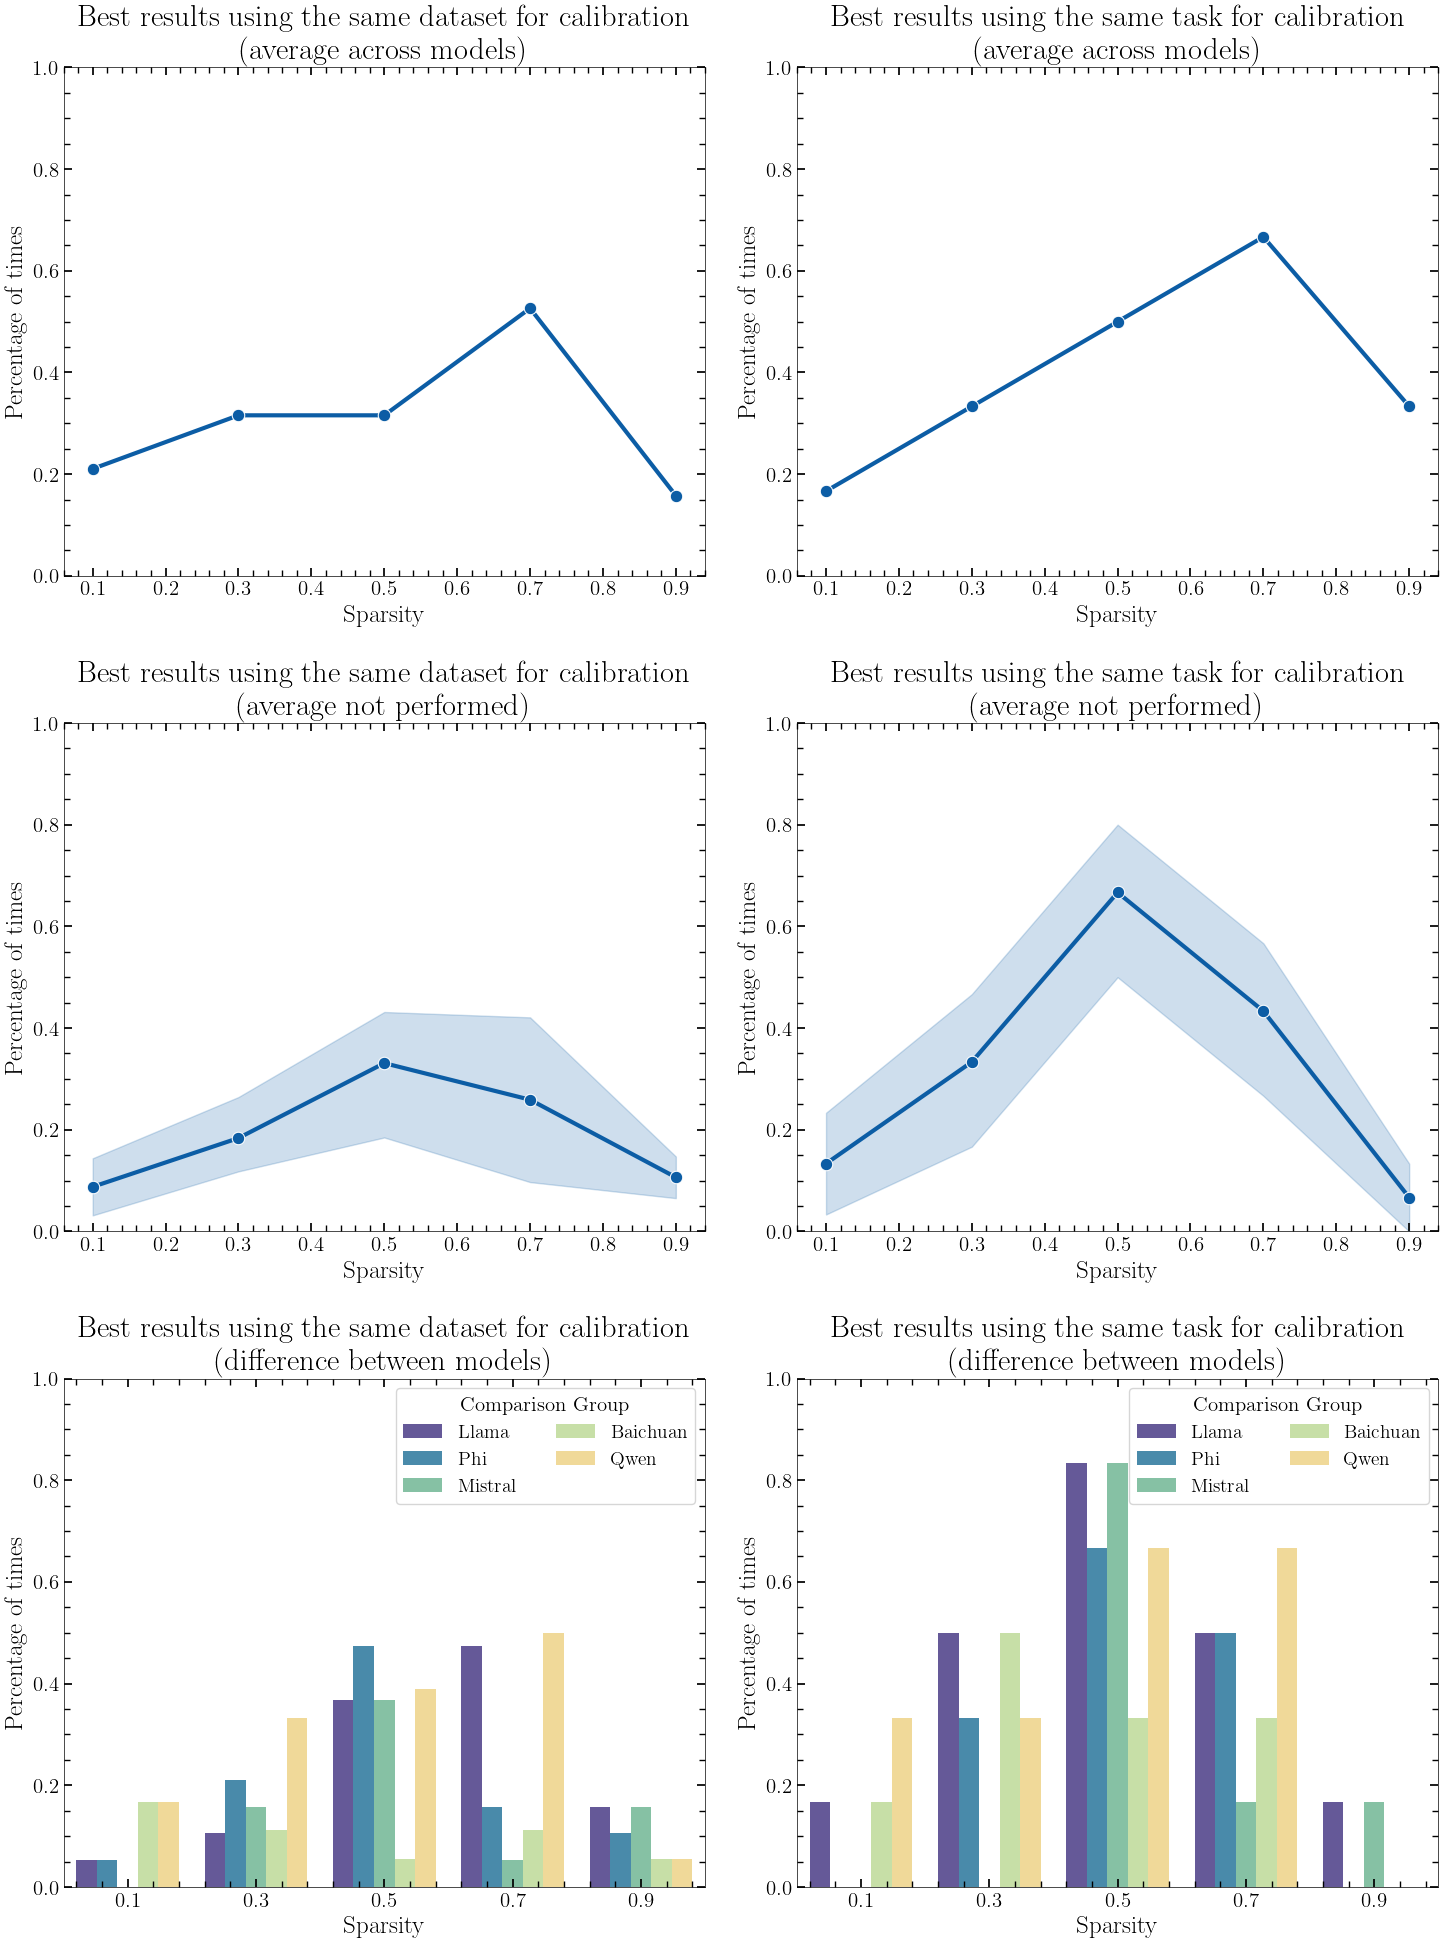

In [18]:
#figure, ax = plt.subplots(4, 2, figsize=(12, 20))
figure, ax = plt.subplots(3, 2, figsize=(15, 20))



#sns.lineplot(data=data, x="percentage_occurrence", y="percentage_elements", hue="sparsity", ax=ax[0, 0], palette=custom_palette, marker="o")
#sns.lineplot(data=data, x="percentage_occurrence", y="percentage_elements", hue="component", ax=ax[0, 1], palette=custom_palette, marker="o")
#ax[0,0].set_title("Percentage of weights Percentage times\n(across datasets)")
#ax[0,1].set_title("Percentage of weights Percentage times\n(across datasets)")
#ax[0,0].set_xlabel("Percentage of times pruned")
#ax[0,1].set_xlabel("Percentage of times pruned")
#ax[0,0].set_ylabel("Percentage of weights")
#ax[0,1].set_ylabel("Percentage of weights")


sns.lineplot(data=counter_same_pruning_evaluation_dataset_mean_models, x="sparsity", y="percentage_correct", ax=ax[0, 0], palette=custom_palette, marker="o", linewidth=3, markersize=9)

ax[0, 0].set_title("Best results using the same dataset for calibration\n(average across models)")
ax[0, 0].set_xlabel("Sparsity")
ax[0, 0].set_ylabel("Percentage of times")
ax[0, 0].set_ylim(0, 1)




sns.lineplot(data=counter_same_pruning_evaluation_task_mean_models, x="sparsity", y="percentage_correct", ax=ax[0, 1], palette=custom_palette, marker="o", linewidth=3, markersize=9)
#ax[1,1].set_xticklabels(components_names, rotation=45, ha='center', fontsize=8)

ax[0, 1].set_title("Best results using the same task for calibration\n(average across models)")
ax[0, 1].set_xlabel("Sparsity")
ax[0, 1].set_ylabel("Percentage of times")
ax[0, 1].set_ylim(0, 1)




sns.lineplot(data=counter_same_pruning_evaluation_dataset, x="sparsity", y="percentage_correct", ax=ax[1, 0], palette=custom_palette, marker="o", linewidth=3, markersize=9)

ax[1, 0].set_title("Best results using the same dataset for calibration\n(average not performed)")
ax[1, 0].set_xlabel("Sparsity")
ax[1, 0].set_ylabel("Percentage of times")
ax[1, 0].set_ylim(0, 1)



sns.lineplot(data=counter_same_pruning_evaluation_task, x="sparsity", y="percentage_correct", ax=ax[1, 1], palette=custom_palette, marker="o", linewidth=3, markersize=9)
#ax[1,1].set_xticklabels(components_names, rotation=45, ha='center', fontsize=8)

ax[1, 1].set_title("Best results using the same task for calibration\n(average not performed)")
ax[1, 1].set_xlabel("Sparsity")
ax[1, 1].set_ylabel("Percentage of times")
ax[1, 1].set_ylim(0, 1)




#sns.lineplot(data=counter_same_pruning_evaluation_dataset, x="model", y="percentage_correct", hue="sparsity", ax=ax[0], palette=custom_palette, marker="o", linewidth=3, markersize=9)
#sns.barplot(data=counter_same_pruning_evaluation_dataset, x="model", y="percentage_correct", hue="sparsity", ax=ax[0], palette=custom_palette)
sns.barplot(data=counter_same_pruning_evaluation_dataset, x="sparsity", y="percentage_correct", hue="model", ax=ax[2, 0], palette=custom_palette)

ax[2, 0].set_title("Best results using the same dataset for calibration\n(difference between models)")
ax[2, 0].set_xlabel("Sparsity")
ax[2, 0].set_ylabel("Percentage of times")
ax[2, 0].legend(title="Comparison Group", title_fontsize=15, loc='upper right', fontsize=14, ncol=2, frameon=True)
ax[2, 0].set_ylim(0, 1)




#sns.lineplot(data=counter_same_pruning_evaluation_task, x="sparsity", y="percentage_correct", ax=ax[1], palette=custom_palette, marker="o", linewidth=3, markersize=9)
sns.barplot(data=counter_same_pruning_evaluation_task, x="sparsity", y="percentage_correct", hue="model", ax=ax[2, 1], palette=custom_palette)
#ax[1,1].set_xticklabels(components_names, rotation=45, ha='center', fontsize=8)

ax[2, 1].set_title("Best results using the same task for calibration\n(difference between models)")
ax[2, 1].set_xlabel("Sparsity")
ax[2, 1].set_ylabel("Percentage of times")
ax[2, 1].legend(title="Comparison Group", title_fontsize=15, loc='upper right', fontsize=14, ncol=2, frameon=True)
ax[2, 1].set_ylim(0, 1)



figure.tight_layout(pad=2)
plt.show()
